# Summary & Introduction

In [1]:
# Notebook Summary:

# V.History: 
# Date First Created: 30 Jul 2025
# Date Modified     : 15 Sep 2025
# Author: Pasupathi Narayanan, Lead AI Scientist at Cognizant, United Kingdom.

#Intro Section

#--------------------------------------------------------------------------------------------------
'''
This notebook is designed to generate predictions using the trained Orthophosphate model. It retrieves
the pre-trained model from a pickle file located in the ./pkls subdirectory and processes the input 
dataset into a format suitable for the model. The notebook utilises multiple encoder files stored under 
the ./encoders subdirectory to predict orthophosphate, using the pickles for all relevant encoders.

        ==============================================================================
        Feature name                     Name of the Encoded pickle file             *
        ==============================================================================
        1. isComplianceSample            - encoder_isComplianceSample.pkl            *
        2. purpose_name                  - encoder_purpose_name.pkl                  *
        3. determinand_unit_name         - encoder_determinand_unit_name.pkl         *
        4. samplingPoint_notation        - encoder_samplingPoint_notation.pkl        *
        5. Season                        - encoder_Season.pkl                        *
        6. Day_of_Week                   - encoder_Day_of_Week.pkl                   *
        7. Month_of_Year                 - encoder_Month_of_Year.pkl                 *
        8. longitude                     - encoder_longitude.pkl                     *
        9. latitude                      - encoder_latitude.pkl                      *
        ==============================================================================
   
'''
#--------------------------------------------------------------------------------------------------
''''''

''

# Pre-requisites

In [2]:
#--------------------------------------------------------------------------------------------------
#Pre-Requisite : 
    #Python version 3.10.15
    #Python 3 (ipykernel) if you use GCP
#--------------------------------------------------------------------------------------------------


# Information Section

In [3]:
'''
    Info Section
'''

# This requires Python 3 ipykernel

'''
01. Conda Environmant activation
================================
    - To activate your environment, use                                                                                                                                          
        $ conda activate your_environment_name

    - To deactivate an active environment, use
        $ conda deactivate
'''

'''
02. Model name: #Light Gradient Boosting Prediction model for Orthophosphate, Following are the tracked Metrics: 
================================================================================================================
    1. RMSE     - Root Mean Squared Error
    2. MAE      - Mean Absolute Error
    3. MSE      - Mean Squared Error
    4. SHAP     - Violin Plot, Summary Plot, History Plot [Explainable AI]
'''

'''
03. Acceptable INPUT Parameters to the Model:
=============================================

    References and Known limitations:
    - Refer to the Environmental Agency Archive for information on WQ Notations. The model uses 
        these notations as per EA's standard denotations. You may refer the notations 
        at the file "./03_prediction_model/templates/Determinand_Notation_Info.csv" 
      
    - Please note, if an observation has a prefix of < or > to indicate a 'limit of detection', remove these 
      and provide the numerical value as obtained. Currently, the model works based on the weightage 
      for a given numerical value. 

    - Following table illustrates the Input variables the model accepts.

        00. samplingPoint_notation         - Sampling point location where the samples taken from    
        01. sampleDateOnly                - Dates the sample is taken from. Acceptable format: dd/mm/yyyy
        02. samplingPoint_notation        - The notations for the sampling points are based on the values specified 
                                            in the EA's database. To find the correct notations, please look at the file
                                            "./03_prediction_model/templates/Sampling_Point_Info.csv". Ensure that 
                                            the input you use matches one of the values listed in that file.
        03. purpose_name                  - Purpose Name (Ex: 'PLANNED INVESTIGATION (LOCAL MONITORING)')
                                            The purpose names are based on the values specified in the EA's database. 
                                            To find the correct purpose names, please look at the file
                                            "./03_prediction_model/templates/Purpose_Name_Info.csv". Ensure that 
                                            the input you use matches one of the values listed in that file.
        04. isComplianceSample            - Is this a compliance sample or not (Ex: Either 'TRUE' or 'FALSE')
        05. samplingPoint_easting         - Easting (BNG Cordinates) - Automatically calculated using sampling point notation
        06. samplingPoint_northing        - Northing (BNG Cordinates) - Automatically calculated using sampling point notation
        _____________________________________________________________________________________________________________________
        Please note that the model has been trained using specific ‘sampling point notations’, ‘purpose names’,
        and ‘isComplianceSample' flags. If you use it to predict a sampling point outside of these values, the model
        won't fail or show errors. However, its prediction accuracy might decrease.   
        _____________________________________________________________________________________________________________________

    
        SNO Notation ID    Name                 Description
        ===================================================
        01. 61             pH                   pH
        02. 68             Turbidity            Turbidity
        03. 76             Temp Water           Temperature of Water
        04. 82             O Dissolved          Oxygen, Dissolved : (Laboratory) as O2
        05. 85             BOD ATU              BOD : 5 Day ATU
        06. 111            Ammonia(N)           Ammoniacal Nitrogen as N
        07. 113            N Organic            Nitrogen, Organic as N
        08. 114            N-Kjeldahl           Nitrogen, Kjeldahl as N
        09. 116            N Oxidised           Nitrogen, Total Oxidised as N
        10. 117            Nitrate-N            Nitrate as N
        11. 118            Nitrite-N            Nitrite as N
        12. 119            NH3 un-ion           Ammonia un-ionised as N
        13. 135            Sld Sus@105C         Solids, Suspended at 105 C
        14. 143            Sld NV@500C          Solids, non-volatile at 500 C
        15. 158            Hardness             Hardness, Total as CaCO3
        16. 162            Alky pH 4.5          Alkalinity to pH 4.5 as CaCO3
        17. 172            Chloride Ion         Chloride
        18. 175            Cyanide - CN         Cyanide as CN
        19. 177            Fluoride - F         Fluoride
        20. 182            SiO2 Rv              Silica, reactive as SiO2
        21. 183            Sulphate SO4         Sulphate as SO4
        22. 192            Phosphate            Phosphate :- {TIP}
        23. 205            Na- Filtered         Sodium, Dissolved
        24. 207            Sodium - Na          Sodium
        25. 209            K- Filtered          Potassium, Dissolved
        26. 211            Potassium- K         Potassium
        27. 235            Mg Filtered          Magnesium, Dissolved
        28. 237            Magnesium-Mg         Magnesium
        29. 239            Ca Filtered          Calcium, Dissolved
        30. 241            Calcium - Ca         Calcium
        31. 301            C - Org Filt         Carbon, Organic, Dissolved as C :- {DOC}
        32. 348            Phosphorus-P         Phosphorus, Total as P
        33. 461            DtrgtAncSyn          Detergents, Anionic
        34. 463            Dtrgt NncSyn         Detergents, Non-ionic
        35. 749            Phenols Mono         Phenols : Monohydric as Phenol
        36. 1181           WethPresTemp         Weather : Temperature
        37. 1183           WethPresPrec         Weather : Precipitation
        38. 3683           N Inorganic          Nitrogen, Total Inorganic : (Calculated)
        39. 6450           Cu Filtered          Copper, Dissolved
        40. 6455           Zinc - as Zn         Zinc
        41. 7859           SO4dis               Sulphate, Dissolved as SO4
        42. 9686           Nitrogen - N         Nitrogen, Total as N
        43. 9856           OrthophsFilt         Orthophosphate, Dissolved
        44. 9901           O Diss %sat          Oxygen, Dissolved, % Saturation
        45. 9924           Oxygen Diss          Oxygen, Dissolved as O2

    - Please note, following parameters can be supplied if available

        Notation ID    Name
        ================================================
        180            OrthoP     (Supplied to validate the model, but is not reqquired for model predictions.
                                        When running the model for obtaining predictions, please include sequence 
                                        numbers so that the model's predicted output and input rows can be 
                                        matched using this.)
        192            Phosphate  (optional)
        348            Phosphorus (optional)
    
    - In the acceptable input variables, following are Section-82 based regulatory parameters

        Notation ID Description
        ===================================================
        119      Ammonia un-ionised as N
        9924     Oxygen, Dissolved as O2
        76       Temperature of Water 
        61       pH
        9901     Oxygen, Dissolved, % Saturation
        82       Oxygen, Dissolved : (Laboratory) as O2
        68       Turbidity

04. Samples considered for the Model Training:
    - This model currently considers samples only from surface water (river/running surface water).
    - It includes all samples under this category, including 'Reactive Monitoring Samples'.
    - The model eliminates sampling points with fewer than 100 observations over the past twenty-four years (2000 to 2024).
    
05. Input template:
    - The format of the input template to be used with this model can be found in the 
      "./03_prediction_model/templates/input_template_orthop2959_pred_lgbm.csv" folder. 
 
'''

''''''

''

# Check python version

In [4]:
#Check python version compatibility, version 3.10.15 is required
!python -V
python_version=!(python --version 2>&1)
print (python_version)

Python 3.10.15
['Python 3.10.15']


# Begin CARD

In [5]:
'''
    Theme: BB1C - Predicting Orthophosphate in UK Catchments Using AIML Models.
    This notebook uses a pre-trained, LightGBM based Orthophosphate model for obtaining predictions
    Author: Pasupathi Narayanan, Lead AI Scientist at Cognizant, United Kingdom.
'''

''''''

''

# Local variables declerations

In [6]:
#Local variable declerations

# <<<FINAL Validation LIST OF FEATURES>>> Modified the "FINAL LIST OF FEATURES" (Total: 58 | 46 Params + 6 Sec-81 params + 6 Spatio Params)
optimal_feat_with_r_mon = ['samplingPoint_notation','samplingPoint_easting',
                           'samplingPoint_northing','purpose_name',
                           'determinand_unit_name_label','purpose_name_label', 'isComplianceSample_label',
                           #'determinand_unit_name',
                           'isComplianceSample',
                           '116','111','117','118','119','9924','162','85','135','172',           #10
                           '241','237','158','182','211','3683','9686','114','113','76',          #10
                           '301','61','9901','183','143','461','207','463','177','6450',          #10
                           '6455','749','209','205','9856','7859','1183','239','175','235',       #10
                           '1181','82','68',                                                      #03
                           '180','192','348'                                                      #03
                           #'OrthoP','Phosphate','Phosphorus' Consider 61 - pH 17% corr
                          ]

#These dummy variables are used by the model to find patterns. Please keep them all set to zero, except 
#for 'determinand_unit_name_label_28', which should be set to one.
determinand_unit_lable = ['determinand_unit_name_label_0','determinand_unit_name_label_3','determinand_unit_name_label_4',
                          'determinand_unit_name_label_5','determinand_unit_name_label_6','determinand_unit_name_label_8',
                          'determinand_unit_name_label_10','determinand_unit_name_label_11','determinand_unit_name_label_12',
                          'determinand_unit_name_label_13','determinand_unit_name_label_14','determinand_unit_name_label_15',
                          'determinand_unit_name_label_16','determinand_unit_name_label_17','determinand_unit_name_label_18',
                          'determinand_unit_name_label_19','determinand_unit_name_label_20','determinand_unit_name_label_25',
                          'determinand_unit_name_label_27','determinand_unit_name_label_28','determinand_unit_name_label_30',
                          'determinand_unit_name_label_35','determinand_unit_name_label_37','determinand_unit_name_label_38',
                          'determinand_unit_name_label_40','determinand_unit_name_label_41','determinand_unit_name_label_47',
                          'determinand_unit_name_label_48','determinand_unit_name_label_54','determinand_unit_name_label_56',
                          'determinand_unit_name_label_57','determinand_unit_name_label_58','determinand_unit_name_label_60',
                          'determinand_unit_name_label_61','determinand_unit_name_label_64','determinand_unit_name_label_65',
                          'determinand_unit_name_label_66','determinand_unit_name_label_67']

#Added on 27 Jul 2025 (to autocreate dummies)
determinand_unit_value = [0,0,0,
                          0,0,0,
                          0,0,0,
                          0,0,0,
                          0,0,0,
                          0,0,0,
                          0,1,0,
                          0,0,0,
                          0,0,0,
                          0,0,0,
                          0,0,0,
                          0,0,0,
                          0,0]

#Combine the variables into a list
from itertools import chain
optimal_feat_with_r_mon = list(chain(optimal_feat_with_r_mon, 
                                     determinand_unit_lable))

#This steps removes duplicate item and retains the first one found
optimal_feat_with_r_mon = list(dict.fromkeys(optimal_feat_with_r_mon))

#Explainable Params for the SP NE-44400163, DEERNESS U/S PRIEST BURN, Wear & Tees area
#Website: https://environment.data.gov.uk/water-quality/view/sampling-point/NE-44400163?_all=true
validation_Set = ['samplingPoint_notation_label','samplingPoint_easting','samplingPoint_northing','purpose_name_label','determinand_unit_name_label',
                  'isComplianceSample_label',
                  'purpose_name_label', 
                  'longitude_label', 'latitude_label',
                  '61','76','77','111','116','117','118','119','162','180','9901','9924',
                  'Day_of_Month', 'Week_of_Year', 'Season_label','Day_of_Week_label','Month_of_Year_label' #Temporal params
                 ]

In [7]:
print(len(optimal_feat_with_r_mon))

92


In [8]:
#Local variable declerations

Section_82_Yes = [61,68,76,81,82,119,3169,3656,3976,5282,6872,7064,
                  7786,8153,8958,9261,9803,9901,9921,9924]

#Section_82_Unsure 11 Determinands
lstSection_82_Unsure = [152,153,159,162,5245,8467,8471,9087,9088,9089,9821]

#First 18 parameters using Pearson correlation for the Phosphate - Feb 27 2025
First_18_Pearson_Pt = [912,914,8128,384,1361,7245,1284,8648,6971,
                       947,6972,82,6453,8476,7668,81,6854,162,8504]

altitude = [5]

# 8 Determinands
temperature = [22, 24, 76, 1181, 3026, 6530, 8091, 8918]

orthoP = [180]
orthoPLike = [188, 191, 8068, 8755, 9398, 9856]

Phosphate = [192]
PhophateLike = [4127, 7315, 8504]


# One-time Installations

In [9]:
# Installing required libraries - for drawing sattelitte maps
! pip install geopandas  | grep -v 'Requirement already satisfied'
! pip install contextily  | grep -v 'Requirement already satisfied'
! pip install pyproj | grep -v 'Requirement already satisfied'
! pip install geodatasets --upgrade  | grep -v 'already satisfied'
! pip install osmnx  | grep -v 'already satisfied'
! pip install optuna | grep -v 'already'

# Note: Avoid upgrading PIP. If you choose to upgrade, please address any resulting incompatibility issues independently.
# You may comment out these installations if you are running them for the second time on the same kernel/environment.


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


# Steps to Enable NVidia GPUs

In [10]:
# Due to version compatibility, these steps did not work. I have documented them to try 
# later if required. While the VCPU performs admirably in terms of execution speed, enabling 
# GPUs can significantly enhance performance for high-volume or real-time predictions.

#configuration of n1-highmem-64 (64 vCPUs, 416 GB RAM) computes.

#Step 1
# Installing required libraries - for version compatibility
#!pip install --force-reinstall numpy==2.1.3
#!pip install --force-reinstall numpy==1.24.0 

#Step 2
# Installing required libraries - for TensorFlow Kernel
#!pip install tensorflow tensorflow_decision_forests | grep -v 'already'
#!pip install --upgrade tensorflow tensorflow_decision_forests | grep -v 'already'

#!pip install --upgrade randomforestmodule
#from keras.utils import timeseries_dataset_from_array

#Step 3
# Installing required libraries
!pip install permetrics | grep -v 'Requirement already satisfied'

#Step 4
# Installing required libraries
#!pip install --ignore-installed --upgrade tensorflow 
#!pip install --upgrade scikit-learn | greb -v 'already'

#Step 5
# Installing required libraries
#!pip install --upgrade tensorflow  | grep -v 'already' Commented on 16 May 2025

#Step 6
# Installing required libraries
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense

#Step 7
# Nvidia version check
#!nvidia-smi

#Step 8
# Installing required libraries for Cuda - Using Nvidia's GPU capability (applicable for GPU computes)
#! pip install \
#    --extra-index-url=https://pypi.nvidia.com \
#    "cudf-cu12==25.2.*" | grep -v 'already'

#Step 9
# Installing required libraries
#import cudf.pandas
#cudf.pandas.install()
#!conda list cuda-python

#!conda install -c nvidia cuda-python=12.8.0 y

#pip install --exists-action=i scikit-learn

#import cupy


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [11]:
# First install required packages if needed
!pip install fuzzywuzzy python-Levenshtein | grep -v 'already'


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


# Import all required libraries

In [12]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from permetrics.regression import RegressionMetric

import matplotlib.pyplot as plt

#Outlier Detection and Removal
#import numpy as np
#import pandas as pd
#import matplotlib.pyplot as plt
import seaborn as sns

import os
import requests
import zipfile
import geopandas as gpd
import contextily as ctx
from pyproj import Transformer
import geodatasets
import matplotlib.cm as cm
import matplotlib.colors as colors
import osmnx as ox
from matplotlib.colors import LinearSegmentedColormap

import joblib
from pathlib import Path
from fuzzywuzzy import process
from fuzzywuzzy import fuzz
import warnings

'''
from IPython.display import display
pd.set_option("max_columns", None) # show all cols
pd.set_option('max_colwidth', None) # show full width of showing cols
pd.set_option("expand_frame_repr", False) # print cols side by side as it's supposed to be
'''

''''''

''

# User defined functions declerations

In [13]:
#function to display the system time
def showtime():
    import time
    from datetime import datetime
    
    t = time.localtime()
    d = datetime.now()
    current_time = time.strftime("%H:%M:%S", t)
    current_date = d.strftime("%d %B %Y")
    print(current_date, current_time)
    return()

In [14]:
#TESTING DUMMY OF DETERMINAND UNIT NAME's INFLUENCE - BEGIN
import statsmodels.api as sm
# Function to calculate VIF
def calculate_vif(data):
    vif_df = pd.DataFrame(columns = ['Var', 'Vif'])
    x_var_names = data.columns
    for i in range(0, x_var_names.shape[0]):
        y = data[x_var_names[i]]
        x = data[x_var_names.drop([x_var_names[i]])]
        r_squared = sm.OLS(y,x).fit().rsquared
        vif = round(1/(1-r_squared),2)
        vif_df.loc[i] = [x_var_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis = 0, ascending=False, inplace=False)


In [15]:
#User-Defined functions
def showtime():
    import time
    from datetime import datetime
    
    t = time.localtime()
    d = datetime.now()
    current_time = time.strftime("%H:%M:%S", t)
    current_date = d.strftime("%d %B %Y")
    print(current_date, current_time)
    return()

In [16]:
#Function to print column-wise total number of actual observations (ignores zeroes) for a given dataset
def find_non_zero_lt_100(data):
    num=0
    count_of_non_zero_lt_100 = []
    total_len = len(data)
    for i in data.columns:
        num += data[i][data[i]==0.0].count()
        count_of_non_zero = total_len - data[i][data[i]==0.0].count()
        #print (data[i].name, ' | ', count_of_zero)
        #if (i==192):
        if (count_of_non_zero<=100):
            print ('Determinand: ', i, ' has Total | Valid values', total_len, '|', count_of_non_zero )
            count_of_non_zero_lt_100.append(i) 

    return (count_of_non_zero_lt_100)

In [17]:
#Find sum of non-zero values
#print(print(np.count_nonzero(data==0)))
def find_non_zero(data):
    num=0
    total_len = len(data)
    for i in data.columns:
        num += data[i][data[i]==0.0].count()
        count_of_non_zero = total_len - data[i][data[i]==0.0].count()
        #print (data[i].name, ' | ', count_of_zero)
        #if (i==192):
        #if (count_of_non_zero>=1):
            #print ('Determinand: ', i, ' has Total | Valid values', total_len, '|', count_of_non_zero )
    #num
    len(data)
    return;

In [18]:
#save given data set as CSV file into a gcp folder
def savedata(tDF, tname, tpath = '../templates/') :
    tpath = '../03_prediction_model/templates/'
    tDF.to_csv(tpath+tname)
    return("saved, Location: ", tpath+tname)


In [19]:
# Function to evaluate model metrics
def evaluate_model(model, X_test, y_test, model_name="Model"):
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} RMSE: {rmse:.2f}")
    print(f"{model_name} R²: {r2:.2f}")
    return y_pred

# Function to evaluate model metrics (Advanced)
def evaluate_model_adv(model, X_test, y_test, model_name="Model", metrics_mode="Test"):            
    if model_name == 'Neural Network' :
        y_pred = model.predict(X_test).flatten()
    else:
        y_pred = model.predict(X_test)
    
    #Obtain metrics for the predicted values where the actual OrthoP is non-zeroes ONLY 
    if (metrics_mode=="validation"): 
        X_Merge = []
        X_Merge = pd.DataFrame(y_test)
        X_Merge['Predicted_OrthoP'] = y_pred
        if (len(X_Merge) == len(y_test)):
            #X_Merge = X_Merge.loc[X_Merge['Predicted_OrthoP']>=0]  # 'Filter OrthoP is GT zero to drop negative values'
            y_test = X_Merge['OrthoP']                  # 'OrthoP'
            y_pred = X_Merge['Predicted_OrthoP']        # 'Predicted OrthoP'
            print("Metrics for ", metrics_mode, " DataSet")
            #print(len(X_valid), len(y_valid), len(X_test1), len(y_test1))

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    #adjusted_r2 = 1-(1-r2(actual,predicted))*(rowcount-1)/(rowcount-featurecount)
    rowcount = len(y_test)
    featurecount = X_test.shape[1]-1
    adjusted_r2 = 1- (1-r2) * (rowcount-1)/(rowcount-featurecount)
    
    #Calculate NRMSE value
    evaluator = RegressionMetric(y_test, y_pred)
    #nrmse = evaluator.normalized_root_mean_square_error()
  
    print("Metrics for the models' Prediction ")
    print(f"{model_name} RMSE: {rmse:.2f}")
    #print(f"{model_name} R²: {r2:.2f}")
    #print(f"{model_name} adjusted Adjusted R²: {adjusted_r2:.2f}")
    nrmse = ((rmse*100)/(y_test.max()-y_test.min()))
    #print(f"{model_name} NRMSE: {nrmse:.2f}%")
    
    mse = errors = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    mape_Explained = "Note that we are not using the common “percentage” definition: "
    mape_Explained = mape_Explained + "the percentage in the range [0, 100] is converted to a relative value in the" 
    mape_Explained = mape_Explained + "range [0, 1] by dividing by 100. Thus, an error of 200% "
    mape_Explained = mape_Explained + "corresponds to a relative error of 2."

    #MAPE MAE and MAE explanations are under this website:
    #https://medium.com/analytics-vidhya/mae-mse-rmse-coefficient-of-determination-adjusted-r-squared-which-metric-is-better-cd0326a5697e

    #R2 and Adjusted R2 explanations are under
    #https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
    
    print(f"{model_name} Mean Squared Err: {mse:.5f}")
    print(f"{model_name} Mean absolute Err: {mae:.2f}")
    if any([ y_test == 0 for y_test in y_test.values ]) :
        print ("MAPE Cant be calculated as Observed has Zero in it")
    else:
        print(f"{model_name} Mean absolute % Err: {mape:.2f}")
    
    #q1, q2, q3 = evaluate_model_q_metrics(y_test, y_pred)

    return y_pred


In [20]:
# Function to evaluate model Qmetrics
# Q-model metrics are designed for spatio-temporal data.
#  These metrics assess the explained variance, bias, and variability of predictions
def evaluate_model_q_metrics(observed, predicted, model_name="Model"):
    
    #Step 1: Import Libraries and Load Data
    #import numpy as np
    #import pandas as pd

    # Example: Create a sample dataset
    # Actual values (observed) and predicted values
    #data = pd.DataFrame({
    #    'observed': [2.3, 2.7, 3.1, 2.9, 3.6, 2.5],
    #    'predicted': [2.4, 2.5, 3.2, 3.0, 3.4, 2.6]
    #})
    
    #Step 2: Define Q-Metrics Functions
    #1. Explained Variance ():
    #Q_1 = 1 - \frac{\sum (y_{\text{obs}} - y_{\text{pred}})^2}{\sum (y_{\text{obs}} - \bar{y}_{\text{obs}})^2}

    #2. Bias ():
    #Q_2 = \frac{\sum (y_{\text{obs}} - y_{\text{pred}})}{\sum (y_{\text{obs}})}

    #3. Variance Ratio ():
    #Q_3 = \frac{\text{Var}(y_{\text{pred}})}{\text{Var}(y_{\text{obs}})}

    # Mean of observed values
    mean_observed = np.mean(observed)
    
    # Residual sum of squares
    ss_res = np.sum((observed - predicted) ** 2)
    
    # Total sum of squares
    ss_tot = np.sum((observed - mean_observed) ** 2)
    
    # Q1: Explained Variance
    q1 = 1 - (ss_res / ss_tot)
    
    # Q2: Bias
    q2 = np.sum(observed - predicted) / np.sum(observed)
    
    # Q3: Variance Ratio
    var_observed = np.var(observed, ddof=1)  # Sample variance
    var_predicted = np.var(predicted, ddof=1)  # Sample variance
    q3 = var_predicted / var_observed

    # Extract observed and predicted values
    #observed = data['observed'].values
    #predicted = data['predicted'].values

    # Compute Q-metrics
    #q1, q2, q3 = evaluate_model_q_metrics(observed, predicted)
    
    print("................................................")
    print("Q Metrics results")
    print(f"Q1 {model_name} (Explained Variance): {q1:.3f}")
    print(f"Q2 {model_name} (Bias): {q2:.3f}")
    print(f"Q3 {model_name} (Variance Ratio): {q3:.3f}")

    return q1, q2, q3


In [21]:
#function to save encldoed labels into a pickle file
def train_and_save_encoders_z(data, categorical_columns, save_path='encoders'):
    """
    Train and save individual label encoders for each categorical column
    """
    import joblib
    encoders = {}
    save_path = "..//03_prediction_model/pkls"
   
    for col in categorical_columns:
        # Create and fit encoder
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])
       
        # Save encoder to individual file
        encoder_path = f'{save_path}/encoder_{col}.pkl'
        joblib.dump(le, encoder_path)
        encoders[col] = encoder_path
       
    return data, encoders

In [22]:
#function to skip the cell of choices
from IPython.core.magic import register_cell_magic
@register_cell_magic
def skip(line, cell):
    return

#Sample Code
#if (len(Xsample) <100):
#    %%skip
#    print("Final Visuals End skipped")
#else:
#    print("Final Visuals End continue")

# Load input (.CSV) file

In [23]:
# Load INPUT dataset (replace 'data.csv' with your dataset)

# Note: A sample input file has been provided for demonstration purposes. For 
# actual predictions, you need to specify your file name in the 'read_file_name' 
# variable and the folder name in the 'folder_name' variable. The module 
# currently accepts CSV formats. You may modify it to accept other formats 
# of your choice and adjust the read statement accordingly.

showtime()
read_file_name = "input_template_orthop2959_pred_lgbm.csv"

#provide your input file name and location
folder_name = './templates/'
data = pd.read_csv( folder_name+ read_file_name,
                   index_col='sampleDateOnly') #Added on 15 May 2025

showtime()
print(len(data))
print(read_file_name)


18 September 2025 15:52:31
18 September 2025 15:52:31
158
input_template_orthop2959_pred_lgbm.csv


In [24]:
data.head(2)

,samplingPoint_easting,samplingPoint_northing,purpose_name,samplingPoint_notation,isComplianceSample,180,116,111,117,118,...,7859,1183,239,175,235,1181,82,68,192,348
sampleDateOnly,,,,,,,,,,,,,,,,,,,,,
01/01/2099,420190.0,542201.0,ENVIRONMENTAL MONITORING (GQA & RE ONLY),NE-44400163,True,0.0,1.10,0.030,1.10,0.005,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01/02/2099,420190.0,542201.0,ENVIRONMENTAL MONITORING (GQA & RE ONLY),NE-44400163,True,0.0,1.05,0.742,1.04,0.009,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
# To keep necessary columns, use if you have additional columns that are not necessary
#data.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

In [26]:
#(data!=0).sum()

In [27]:
#print(data.columns)
#optimal_feat_with_r_mon

In [28]:
#Pasu - Added on 27 Jul 2025 (to autocreate dummies)
#This should be commented out as the new method for the CSV input file does not include these dummy columns
#data.drop(determinand_unit_lable, axis=1, inplace=True)
#data.columns

new_cols = determinand_unit_lable
new_vals = determinand_unit_value

# Map new columns as keys and new values as values
col_val_mapping = dict(zip(new_cols, new_vals))

# Unpack new column/new value pairs and assign them to the data frame
print(len(data.columns))
data = data.assign(**col_val_mapping)
print(len(data.columns))
#data.columns

51
89


In [29]:
data.head(2)

,samplingPoint_easting,samplingPoint_northing,purpose_name,samplingPoint_notation,isComplianceSample,180,116,111,117,118,...,determinand_unit_name_label_54,determinand_unit_name_label_56,determinand_unit_name_label_57,determinand_unit_name_label_58,determinand_unit_name_label_60,determinand_unit_name_label_61,determinand_unit_name_label_64,determinand_unit_name_label_65,determinand_unit_name_label_66,determinand_unit_name_label_67
sampleDateOnly,,,,,,,,,,,,,,,,,,,,,
01/01/2099,420190.0,542201.0,ENVIRONMENTAL MONITORING (GQA & RE ONLY),NE-44400163,True,0.0,1.10,0.030,1.10,0.005,...,0,0,0,0,0,0,0,0,0,0
01/02/2099,420190.0,542201.0,ENVIRONMENTAL MONITORING (GQA & RE ONLY),NE-44400163,True,0.0,1.05,0.742,1.04,0.009,...,0,0,0,0,0,0,0,0,0,0


In [30]:
print(len(data))

158


In [31]:
#Check if there are duplicate rows exist. May be a measure is taken twice for same purpose and location. 
print(data.columns[data.columns.duplicated()])

#If exist, develope code to remove
if (len(data.duplicated())!=(len(data))):
    print("Develop code to retain the first occurance alone")
    print(len(data), len(data.duplicated()))
    dftemp = data.drop_duplicates(keep='first')
    print(len(dftemp), len(data))
else:
    print("No duplicates, proceed...")

Index([], dtype='object')
No duplicates, proceed...


In [32]:
#Pasu - Combining needed variable lists - Added on 16 May 2025 
#df = data[optimal_feat_with_r_mon].copy() modified on 01 Aug 2025
'''
#Combine the variables into a list
from itertools import chain
optimal_feat_combined = list(chain(optimal_feat_with_r_mon, 
                                     determinand_unit_lable))

#This steps removes duplicate item and retains the first one found
optimal_feat_with_r_mon = list(dict.fromkeys(optimal_feat_with_r_mon))
'''

if set(optimal_feat_with_r_mon).issubset(data.columns):
    print("All required columns exist? : Yes")
    df = data[optimal_feat_with_r_mon].copy()
else:
    #No
    print("Verified that few columns are not present, hence picking only the desired column names given...")
    
    #Filter optimal_feat_with_r_mon with the existing columns in data
    cols_exist = [col for col in optimal_feat_with_r_mon if col in data]
    cols_to_add = [col for col in optimal_feat_with_r_mon if col not in data]
    
    df = data[cols_exist].copy()
    if (len(cols_to_add) > 0):
        #Include the columns with zero values
        for columns in cols_to_add:
            data[columns]=0
    #select columns from the data dataframe
    print ("\n Columns exist in the input dataset are: ", cols_exist) 
    print ("\n Columns added with zeroes into the input dataset are: ", cols_to_add)
    print ("\n Total columns in the input data set is: ", len(data.columns))
    #print(data.columns)

df.head(2)

Verified that few columns are not present, hence picking only the desired column names given...

 Columns exist in the input dataset are:  ['samplingPoint_notation', 'samplingPoint_easting', 'samplingPoint_northing', 'purpose_name', 'isComplianceSample', '116', '111', '117', '118', '119', '9924', '162', '85', '135', '172', '241', '237', '158', '182', '211', '3683', '9686', '114', '113', '76', '301', '61', '9901', '183', '143', '461', '207', '463', '177', '6450', '6455', '749', '209', '205', '9856', '7859', '1183', '239', '175', '235', '1181', '82', '68', '180', '192', '348', 'determinand_unit_name_label_0', 'determinand_unit_name_label_3', 'determinand_unit_name_label_4', 'determinand_unit_name_label_5', 'determinand_unit_name_label_6', 'determinand_unit_name_label_8', 'determinand_unit_name_label_10', 'determinand_unit_name_label_11', 'determinand_unit_name_label_12', 'determinand_unit_name_label_13', 'determinand_unit_name_label_14', 'determinand_unit_name_label_15', 'determinand_uni

,samplingPoint_notation,samplingPoint_easting,samplingPoint_northing,purpose_name,isComplianceSample,116,111,117,118,119,...,determinand_unit_name_label_54,determinand_unit_name_label_56,determinand_unit_name_label_57,determinand_unit_name_label_58,determinand_unit_name_label_60,determinand_unit_name_label_61,determinand_unit_name_label_64,determinand_unit_name_label_65,determinand_unit_name_label_66,determinand_unit_name_label_67
sampleDateOnly,,,,,,,,,,,,,,,,,,,,,
01/01/2099,NE-44400163,420190.0,542201.0,ENVIRONMENTAL MONITORING (GQA & RE ONLY),True,1.10,0.030,1.10,0.005,0.0003,...,0,0,0,0,0,0,0,0,0,0
01/02/2099,NE-44400163,420190.0,542201.0,ENVIRONMENTAL MONITORING (GQA & RE ONLY),True,1.05,0.742,1.04,0.009,0.0089,...,0,0,0,0,0,0,0,0,0,0


In [33]:
#Giving appropriate labels to the Determinand Notations
df = df.rename(columns={'180':'OrthoP'})
df = df.rename(columns={'192':'Phosphate'})
df = df.rename(columns={'348':'Phosphorus'})
#df = df.rename(columns={'9398':'OrthoPAsP'})

In [34]:
#print(len(df.columns), len(dfPt.columns), len(dfPr.columns), len(df), len(dfPt), len(dfPr))
print(len(df.columns), len(df))

#89 <total no. of input data points>

89 158


In [35]:
#Filter the Date out of Datetime
#df['sampleDateOnly'] = pd.to_datetime(df['sampleDateOnly'], utc=True)
#df['sampleDateOnly'] = df['sampleDateOnly'].dt.date
#df = df.set_index('sampleDateOnly')
#df.head(2)

In [36]:
print("Min max range Orthophosphate: ", df['OrthoP'].min(),df['OrthoP'].max())
print("Min max range Phosphate: ", df['Phosphate'].min(),df['Phosphate'].max())
print("Size of 24 Yrs dataset considered for Orthophosphate prediction: ", len(df))
#print("Min max range Phosphorus: ", df['Phosphorus'].min(),df['Phosphorus'].max())
#df = df[df.Phosphate != 708.4978]
#print(df['Phosphate'].min(),df['Phosphate'].max())

'''
Min max range Orthophosphate:  0.0 33658.7825
Min max range Phosphate:  0.0 2240.0
Size of 24 Yrs dataset considered for Orthophosphate prediction:  9278441
'''

Min max range Orthophosphate:  0.0 0.147
Min max range Phosphate:  0.0 0.0
Size of 24 Yrs dataset considered for Orthophosphate prediction:  158


'\nMin max range Orthophosphate:  0.0 33658.7825\nMin max range Phosphate:  0.0 2240.0\nSize of 24 Yrs dataset considered for Orthophosphate prediction:  9278441\n'

In [37]:
#Giving a meaningful label to the Determinand Notation
df = df.rename(columns={'116':'116_N Oxidised_UnC', '111':'111_Ammonia(N)_UnC', 
                        '117':'117_Nitrate-N_UnC','118':'118_Nitrite-N_UnC', 
                        '119':'119_NH3 un-ion_Section82','9924':'9924_Oxygen Diss_Section82', 
                        '162':'162_Alky pH 4.5_UnS','85':'85_BOD ATU_UnC',
                        '135':'135_Sld Sus@105C_UnC','172':'172_Chloride Ion_UnC', 
                        '241':'241_Calcium - Ca_UnC','237':'237_Magnesium-Mg_UnC', 
                        '158':'158_Hardness_UnC','182':'182_SiO2 Rv_UnC', 
                        '211':'211_Potassium- K_UnC', '3683':'3683_N Inorganic_UnC', 
                        '9686':'9686_Nitrogen - N_UnC','114':'114_N-Kjeldahl_UnC', 
                        #'192':'192_Phosphate_UnC', '348':'348_Phosphorus-P_UnC',
                        '113':'113_N Organic_UnC','76':'76_Temp Water_Section82', 
                        '301':'301_C - Org Filt_UnC', '61':'61_pH_Section82', 
                        '9901':'9901_O Diss %sat_Section82','183':'183_Sulphate SO4_UnC',
                        '143':'143_Sld NV@500C_UnC','461':'461_DtrgtAncSyn_UnC', 
                        '207':'207_Sodium - Na_UnC','463':'463_Dtrgt NncSyn_UnC',
                        '177':'177_Fluoride - F_UnC', '77':'77_Cond @ 25C_UnC',
                        '6450':'6450_Cu Filtered_UnC','6455':'6455_Zinc - as Zn_UnC',
                        '749':'749_Phenols Mono_UnC', '209':'209_K- Filtered_UnC',
                        '205':'205_Na- Filtered_UnC','9856':'9856_OrthophsFilt_UnC',
                        '7859':'7859_SO4dis_UnC', '1183':'1183_WethPresPrec_UnC',
                        '239':'239_Ca Filtered_UnC','175':'175_Cyanide - CN_UnC',
                        '235':'235_Mg Filtered_UnC', '1181':'1181_WethPresTemp_UnC',
                        '82':'82_O Dissolved_Section82'})

In [38]:
from itertools import chain
full_list = list(chain(First_18_Pearson_Pt, 
                       Section_82_Yes,
                       altitude, temperature, 
                       orthoP, orthoPLike,
                       Phosphate, PhophateLike))
full_list = list(dict.fromkeys(full_list))

#data = dftemp[dftemp.determinand_notation.isin(full_list)]
data = df
#del (df)

In [39]:
print(
    df['OrthoP'][df['OrthoP']==0.0].count(),
    df['OrthoP'][df['OrthoP']==0].count(),
    df['OrthoP'][df['OrthoP']=='0'].count(),
    df['OrthoP'][df['OrthoP']=='0.0'].count(),
    df['OrthoP'][df['OrthoP']==''].count(),
    df['OrthoP'][df['OrthoP'].isna()].count(),
    df['OrthoP'][df['OrthoP'].isnull()].count()
)

#7908021 7908021 0 0 0 0 0

4 4 0 0 0 0 0


In [40]:
#Find sum of non-zero values
find_non_zero(data)

In [41]:
#duplicate_cols = data.columns[data.columns.duplicated()]
#print("before duplicate removal:", duplicate_cols)
#data = data.loc[~data.index.duplicated(),:]
#print("after duplicate removal:", data.columns[data.columns.duplicated()])

In [42]:
#data.columns[data.columns.duplicated()]
#data.drop(columns=['Phosphate', 'Phosphorus'], axis=1, inplace=True)
#data.columns[data.columns.duplicated()]

In [43]:
#df.columns

In [44]:
# Map encoded values using the actual column values 
'''
def map_encoded_val(value):
    try:
        return category[value]
    except KeyError as e:
        #print(f"Warning: Unseen category '{value}' detected. Returning -1")
        #print(KeyError.with_traceback)
        e
        return -1  # Handle unseen values
'''

def map_encoded_val_adv(colName, value_df):
    folder_path = './encoders/' 
    file_name = folder_path + 'encoder_' + colName + '.pkl'
    print (file_name)
    encoder = joblib.load(file_name)

    #print(encoder.classes_)
    
    # Create mapping dictionary from the encoder
    category = {category: idx for idx, category in enumerate(encoder.classes_)}
    #category = {str(category).lower(): (category, idx) for idx, category in enumerate(encoder.classes_)}
    #category = {str(cat).lower(): (cat, idx) for idx, cat in enumerate(encoder.classes_)}
    #print (category)


    def map_encoded_val(value):
        try:
            return category[value]
        except KeyError as e:
            #print(f"Warning: Unseen category '{value}' detected. Returning -1")
            #return -1  # Handle unseen values
            return 99999  # Handling unseen values by deleting them
    
    newcolName = colName+'_label'
    value_df[newcolName] = value_df[colName].apply(map_encoded_val)
    
    return value_df

In [45]:
'''
data['samplingPoint_notation'].nunique()
from sklearn.preprocessing import LabelEncoder 
labelencoder= LabelEncoder() #initializing an object of class LabelEncoder
#data['samplingPoint_notation_label'] = labelencoder.fit_transform(data['samplingPoint_notation']) #fitting and transforming the desired categorical column.

#Save Encoders into Pickle file
# List of categorical columns to encode
categorical_cols = ['samplingPoint_notation']

# Process data and save encoders
data, encoder_paths = train_and_save_encoders(data, categorical_cols)

#data_refSamplingPointNot = data.drop_duplicates(subset=['samplingPoint_notation_label'])[['samplingPoint_notation','samplingPoint_notation_label']]

data.head(2)
'''

#Load and Match the encoded values to the dataframe
if set(['isComplianceSample']).issubset(df.columns):
    df = map_encoded_val_adv('isComplianceSample', df)

if set(['samplingPoint_notation']).issubset(df.columns):
    df = map_encoded_val_adv("samplingPoint_notation", df)

if set(['purpose_name']).issubset(df.columns):
    df = map_encoded_val_adv("purpose_name",df)

df.head(2)


./encoders/encoder_isComplianceSample.pkl
./encoders/encoder_samplingPoint_notation.pkl
./encoders/encoder_purpose_name.pkl


,samplingPoint_notation,samplingPoint_easting,samplingPoint_northing,purpose_name,isComplianceSample,116_N Oxidised_UnC,111_Ammonia(N)_UnC,117_Nitrate-N_UnC,118_Nitrite-N_UnC,119_NH3 un-ion_Section82,...,determinand_unit_name_label_58,determinand_unit_name_label_60,determinand_unit_name_label_61,determinand_unit_name_label_64,determinand_unit_name_label_65,determinand_unit_name_label_66,determinand_unit_name_label_67,isComplianceSample_label,samplingPoint_notation_label,purpose_name_label
sampleDateOnly,,,,,,,,,,,,,,,,,,,,,
01/01/2099,NE-44400163,420190.0,542201.0,ENVIRONMENTAL MONITORING (GQA & RE ONLY),True,1.10,0.030,1.10,0.005,0.0003,...,0,0,0,0,0,0,0,1,8207,2
01/02/2099,NE-44400163,420190.0,542201.0,ENVIRONMENTAL MONITORING (GQA & RE ONLY),True,1.05,0.742,1.04,0.009,0.0089,...,0,0,0,0,0,0,0,1,8207,2


In [46]:
print ("\n Total Sampling point notation: ", len(df)) 
print ("\n Sampling point notation of unseen categories: ", df.samplingPoint_notation_label[df.samplingPoint_notation_label==0].count())
print("\n Dropping all unmatched samplingPoint_notation_label...")
df = df[df.samplingPoint_notation_label!=0]
print ("\n Total samplingPoint_notation_label after removal of unseen Purpose names: ", len(df))



 Total Sampling point notation:  158

 Sampling point notation of unseen categories:  0

 Dropping all unmatched samplingPoint_notation_label...

 Total samplingPoint_notation_label after removal of unseen Purpose names:  158


In [47]:
print ("\n Total purpose_name_label: ", len(df))
print ("\n purpose_name_label of unseen categories: ", df.purpose_name_label[df.purpose_name_label==0].count())
print("\n Dropping all unmatched purpose_name_label...")
df = df[df.purpose_name_label!=0]
print ("\n Total purpose_name_label after removal of unseen Purpose names: ", len(df))



 Total purpose_name_label:  158

 purpose_name_label of unseen categories:  0

 Dropping all unmatched purpose_name_label...

 Total purpose_name_label after removal of unseen Purpose names:  158


In [48]:

#Create samplingPoint reference dataset for later reference
#samplingPoint_Ref = data[['samplingPoint_notation','samplingPoint_notation_label', 
#                          'samplingPoint_easting','samplingPoint_northing']] #Commented on 16 May 2025

#samplingPoint_Ref = df[['samplingPoint_notation', 
#                          'samplingPoint_easting','samplingPoint_northing']]  #Added on 16 May 2025

#df = df.drop(columns=['samplingPoint_notation'])
#samplingPoint_Ref.head(2)


In [49]:
type(df.index)

pandas.core.indexes.base.Index

In [50]:
#Exploiting Temporal characteristics for the Temperature data
print(type(df.index)) #It should display <class 'pandas.core.indexes.datetimes.DatetimeIndex'>, If it does not then execute below 
df['datetimeforSeasonality'] = df.index
#df.index =  pd.to_datetime(df.index, format='%Y/%m/%d')
df.index =  pd.to_datetime(df.index) #Changed on 01 Aug 2025: Discarded the format
print(type(df.index)) 

#data['datetimeforSeasonality'] = pd.to_datetime(data['datetimeforSeasonality'])
#print(type(data['datetimeforSeasonality']))
#data = data.drop(columns=['datetimeforSeasonality']) 

<class 'pandas.core.indexes.base.Index'>
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [51]:

#Seasonality for the determinand 8091-Temperature, measured in celcius
#Exploiting Temporal characteristics for the Temperature data

# Function to determine the season
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'

# Extracting the required information
df['Season'] = df.index.map(get_season)

df.head(2)


,samplingPoint_notation,samplingPoint_easting,samplingPoint_northing,purpose_name,isComplianceSample,116_N Oxidised_UnC,111_Ammonia(N)_UnC,117_Nitrate-N_UnC,118_Nitrite-N_UnC,119_NH3 un-ion_Section82,...,determinand_unit_name_label_61,determinand_unit_name_label_64,determinand_unit_name_label_65,determinand_unit_name_label_66,determinand_unit_name_label_67,isComplianceSample_label,samplingPoint_notation_label,purpose_name_label,datetimeforSeasonality,Season
sampleDateOnly,,,,,,,,,,,,,,,,,,,,,
2099-01-01,NE-44400163,420190.0,542201.0,ENVIRONMENTAL MONITORING (GQA & RE ONLY),True,1.10,0.030,1.10,0.005,0.0003,...,0,0,0,0,0,1,8207,2,01/01/2099,Winter
2099-01-02,NE-44400163,420190.0,542201.0,ENVIRONMENTAL MONITORING (GQA & RE ONLY),True,1.05,0.742,1.04,0.009,0.0089,...,0,0,0,0,0,1,8207,2,01/02/2099,Winter


In [52]:
#Exploiting Temporal characteristics for the Temperature data
df['Day_of_Month'] = df.index.day
df['Day_of_Week'] = df.index.day_name()
df['Month_of_Year'] = df.index.month_name()
df['Week_of_Year'] = df.index.isocalendar().week
df.head(2)

,samplingPoint_notation,samplingPoint_easting,samplingPoint_northing,purpose_name,isComplianceSample,116_N Oxidised_UnC,111_Ammonia(N)_UnC,117_Nitrate-N_UnC,118_Nitrite-N_UnC,119_NH3 un-ion_Section82,...,determinand_unit_name_label_67,isComplianceSample_label,samplingPoint_notation_label,purpose_name_label,datetimeforSeasonality,Season,Day_of_Month,Day_of_Week,Month_of_Year,Week_of_Year
sampleDateOnly,,,,,,,,,,,,,,,,,,,,,
2099-01-01,NE-44400163,420190.0,542201.0,ENVIRONMENTAL MONITORING (GQA & RE ONLY),True,1.10,0.030,1.10,0.005,0.0003,...,0,1,8207,2,01/01/2099,Winter,1.0,Thursday,January,1
2099-01-02,NE-44400163,420190.0,542201.0,ENVIRONMENTAL MONITORING (GQA & RE ONLY),True,1.05,0.742,1.04,0.009,0.0089,...,0,1,8207,2,01/02/2099,Winter,2.0,Friday,January,1


In [53]:
#print(len(samplingPoint_Ref), len(df))
print(len(df))

158


In [54]:
#Converting categorical data into numerical since Only numberical data is allowed for Scaling and Standardization 
#Season, Day_of_Week, Month_of_Year

'''
from sklearn.preprocessing import LabelEncoder 
labelencoder= LabelEncoder() #initializing an object of class LabelEncoder

#Commented on 16 May 2025: Store encoders in a pickle file to construct the input dataset when using the pre-trained model version.
#data['Season_label'] = labelencoder.fit_transform(data['Season']) #fitting and transforming the desired categorical column.
#data['Day_of_Week_label'] = labelencoder.fit_transform(data['Day_of_Week']) #fitting and transforming the desired categorical column.
#data['Month_of_Year_label'] = labelencoder.fit_transform(data['Month_of_Year']) #fitting and transforming the desired categorical column.

#Added on 16 May 2025: Store encoders in a pickle file to construct the input dataset when using the pre-trained model version.
#Save Encoders into Pickle file
# List of categorical columns to encode
categorical_cols = ['Season', 'Day_of_Week', 'Month_of_Year']

# Process data and save encoders
data, encoder_paths = train_and_save_encoders(data, categorical_cols)
#Added on 16 May 2025: Store encoders in a pickle file to construct the input dataset when using the pre-trained model version.

#add the categorical variable into a reference dataset for later reference 
#Commented on 16 May 2025 as the encoder labels are created without the suffix of _label, instead it is created on the same column 
#names. Moreoever, the label codes are stored in a pickle file for later usage so getting rid of _Ref tables
#samplingPoint_Ref = samplingPoint_Ref.merge(data[['Season', 'Day_of_Week', 'Month_of_Year','Season_label', 'Day_of_Week_label','Month_of_Year_label']], 
#                                            left_index=True, right_index=True, how='left')
#samplingPoint_Ref.head(2)

#data = data.drop(columns=['Season', 'Day_of_Week', 'Month_of_Year', 'datetimeforSeasonality'])
'''

#Load and Match the encoded values to the dataframe
df = map_encoded_val_adv('Season', df)
df = map_encoded_val_adv('Day_of_Week', df)
df = map_encoded_val_adv('Month_of_Year', df)

df = df.drop(columns=['datetimeforSeasonality'])
df.head(2)


./encoders/encoder_Season.pkl
./encoders/encoder_Day_of_Week.pkl
./encoders/encoder_Month_of_Year.pkl


,samplingPoint_notation,samplingPoint_easting,samplingPoint_northing,purpose_name,isComplianceSample,116_N Oxidised_UnC,111_Ammonia(N)_UnC,117_Nitrate-N_UnC,118_Nitrite-N_UnC,119_NH3 un-ion_Section82,...,samplingPoint_notation_label,purpose_name_label,Season,Day_of_Month,Day_of_Week,Month_of_Year,Week_of_Year,Season_label,Day_of_Week_label,Month_of_Year_label
sampleDateOnly,,,,,,,,,,,,,,,,,,,,,
2099-01-01,NE-44400163,420190.0,542201.0,ENVIRONMENTAL MONITORING (GQA & RE ONLY),True,1.10,0.030,1.10,0.005,0.0003,...,8207,2,Winter,1.0,Thursday,January,1,3,4,4
2099-01-02,NE-44400163,420190.0,542201.0,ENVIRONMENTAL MONITORING (GQA & RE ONLY),True,1.05,0.742,1.04,0.009,0.0089,...,8207,2,Winter,2.0,Friday,January,1,3,0,4


In [55]:
#df.columns

In [56]:
transformer = Transformer.from_crs("EPSG:27700", "EPSG:4326", always_xy=True) 
df['longitude'], df['latitude'] = transformer.transform(
    df['samplingPoint_easting'].values, df['samplingPoint_northing'].values)

# Convert to a GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(
    df['longitude'], df['latitude']), crs='EPSG:4326')

gdf.head(2)

,samplingPoint_notation,samplingPoint_easting,samplingPoint_northing,purpose_name,isComplianceSample,116_N Oxidised_UnC,111_Ammonia(N)_UnC,117_Nitrate-N_UnC,118_Nitrite-N_UnC,119_NH3 un-ion_Section82,...,Day_of_Month,Day_of_Week,Month_of_Year,Week_of_Year,Season_label,Day_of_Week_label,Month_of_Year_label,longitude,latitude,geometry
sampleDateOnly,,,,,,,,,,,,,,,,,,,,,
2099-01-01,NE-44400163,420190.0,542201.0,ENVIRONMENTAL MONITORING (GQA & RE ONLY),True,1.10,0.030,1.10,0.005,0.0003,...,1.0,Thursday,January,1,3,4,4,-1.687667,54.774324,POINT (-1.68767 54.77432)
2099-01-02,NE-44400163,420190.0,542201.0,ENVIRONMENTAL MONITORING (GQA & RE ONLY),True,1.05,0.742,1.04,0.009,0.0089,...,2.0,Friday,January,1,3,0,4,-1.687667,54.774324,POINT (-1.68767 54.77432)


In [57]:
'''
from sklearn.preprocessing import LabelEncoder 
labelencoder= LabelEncoder() #initializing an object of class LabelEncoder

#Commented on 16 May 2025: Store encoders in a pickle file to construct the input dataset when using the pre-trained model version.
#longitude - latitude - geometry
#gdf['longitude_label'] = labelencoder.fit_transform(gdf['longitude'])
#gdf['latitude_label'] = labelencoder.fit_transform(gdf['latitude'])
#gdf['geometry_label'] = labelencoder.fit_transform(gdf['geometry']) 


#Added on 16 May 2025: Store encoders in a pickle file to construct the input dataset when using the pre-trained model version.
#Save Encoders into Pickle file
# List of categorical columns to encode
categorical_cols = ['longitude', 'latitude']

# Process data and save encoders
gdf, encoder_paths = train_and_save_encoders(gdf, categorical_cols)
#Added on 16 May 2025: Store encoders in a pickle file to construct the input dataset when using the pre-trained model version.

#Commented on 16 May 2025 as the encoder labels are created without the suffix of _label, instead it is created on the same column 
#names. Moreoever, the label codes are stored in a pickle file for later usage so getting rid of _Ref tables
#data_refEastNorthLatLon = gdf.drop_duplicates(subset=['samplingPoint_notation'
#                                                     ])[['samplingPoint_notation', 'samplingPoint_easting', 'samplingPoint_northing',
#                                                         'longitude','latitude','longitude_label', 'latitude_label']]
'''


#Load and Match the encoded values to the dataframe
gdf = map_encoded_val_adv('longitude', gdf)
gdf = map_encoded_val_adv('latitude', gdf)

gdf.head(2)


./encoders/encoder_longitude.pkl
./encoders/encoder_latitude.pkl


,samplingPoint_notation,samplingPoint_easting,samplingPoint_northing,purpose_name,isComplianceSample,116_N Oxidised_UnC,111_Ammonia(N)_UnC,117_Nitrate-N_UnC,118_Nitrite-N_UnC,119_NH3 un-ion_Section82,...,Month_of_Year,Week_of_Year,Season_label,Day_of_Week_label,Month_of_Year_label,longitude,latitude,geometry,longitude_label,latitude_label
sampleDateOnly,,,,,,,,,,,,,,,,,,,,,
2099-01-01,NE-44400163,420190.0,542201.0,ENVIRONMENTAL MONITORING (GQA & RE ONLY),True,1.10,0.030,1.10,0.005,0.0003,...,January,1,3,4,4,-1.687667,54.774324,POINT (-1.68767 54.77432),12022,20867
2099-01-02,NE-44400163,420190.0,542201.0,ENVIRONMENTAL MONITORING (GQA & RE ONLY),True,1.05,0.742,1.04,0.009,0.0089,...,January,1,3,0,4,-1.687667,54.774324,POINT (-1.68767 54.77432),12022,20867


In [58]:
#Clean up process Check whether the _label columns have unseen values
print (gdf[gdf['samplingPoint_notation_label']==0].count().sum(),
       gdf[gdf['longitude_label']==0].count().sum(),
       gdf[gdf['latitude_label']==0].count().sum())

#Clean up process If values for _label columns returned as zero then these are unseen data which shall bias the trained model hence remove them
print("Before cleaning: ", len(gdf))
gdf = gdf[gdf['samplingPoint_notation_label']>0]
gdf = gdf[gdf['longitude_label']>0]
gdf = gdf[gdf['latitude_label']>0]
print("After cleaning: ", len(gdf))

0 0 0
Before cleaning:  158
After cleaning:  158


In [59]:
#gdf.describe
#gdf.columns
#gdf.info

In [60]:
#Fill all leading days zero value with the same until a day finding a valid value
#data = data.ffill(axis ='rows')
#data = df[full_list_30]
#data.fillna(method='pad', inplace=True)  # Forward fill
#data.fillna(method='bfill', inplace=True)  # Backward fill for the rest of the data where it still have zero values after forward fill

#find_non_zero(data) Pasu
listof_lt_100 = find_non_zero_lt_100(df)
print("Total number of columns have less than 100 observations: ", len(listof_lt_100), "Out of : ", len(df.columns))
listof_lt_100

#following are removed but they are section 82 parameters
# 9803, 9261, 8958, 7786, 7064, 6872, 5282

dataTuned = gdf.drop(columns=listof_lt_100) #Commented temporarily as this is not adding any value to the model accuracy
#dataTuned.columns

Determinand:  determinand_unit_name_label_0  has Total | Valid values 158 | 0
Determinand:  determinand_unit_name_label_3  has Total | Valid values 158 | 0
Determinand:  determinand_unit_name_label_4  has Total | Valid values 158 | 0
Determinand:  determinand_unit_name_label_5  has Total | Valid values 158 | 0
Determinand:  determinand_unit_name_label_6  has Total | Valid values 158 | 0
Determinand:  determinand_unit_name_label_8  has Total | Valid values 158 | 0
Determinand:  determinand_unit_name_label_10  has Total | Valid values 158 | 0
Determinand:  determinand_unit_name_label_11  has Total | Valid values 158 | 0
Determinand:  determinand_unit_name_label_12  has Total | Valid values 158 | 0
Determinand:  determinand_unit_name_label_13  has Total | Valid values 158 | 0
Determinand:  determinand_unit_name_label_14  has Total | Valid values 158 | 0
Determinand:  determinand_unit_name_label_15  has Total | Valid values 158 | 0
Determinand:  determinand_unit_name_label_16  has Total | 

In [61]:
print(len(gdf.columns), gdf.columns) 
#61

105 Index(['samplingPoint_notation', 'samplingPoint_easting',
       'samplingPoint_northing', 'purpose_name', 'isComplianceSample',
       '116_N Oxidised_UnC', '111_Ammonia(N)_UnC', '117_Nitrate-N_UnC',
       '118_Nitrite-N_UnC', '119_NH3 un-ion_Section82',
       ...
       'Month_of_Year', 'Week_of_Year', 'Season_label', 'Day_of_Week_label',
       'Month_of_Year_label', 'longitude', 'latitude', 'geometry',
       'longitude_label', 'latitude_label'],
      dtype='object', length=105)


In [62]:
#!pip install cuml-cu12 --extra-index-url=https://pypi.nvidia.com
# or
#!conda install -c conda-forge cudf cuml

In [63]:
#Release memory for the modeling operations
#del(data, samplingPoint_Ref, data_refSamplingPointNot, data_refEastNorthLatLon, dataTuned)
#del(df, samplingPoint_Ref, dataTuned) #Commented on 01 Aug 2025
del(df, dataTuned)

In [64]:
#Negative OrthoP values check
print(len(gdf[gdf['OrthoP']<0]))
#gdf.drop(gdf[gdf['OrthoP'] < 24000].index, inplace = True)

#0

0


In [65]:
gdf.head(2)

,samplingPoint_notation,samplingPoint_easting,samplingPoint_northing,purpose_name,isComplianceSample,116_N Oxidised_UnC,111_Ammonia(N)_UnC,117_Nitrate-N_UnC,118_Nitrite-N_UnC,119_NH3 un-ion_Section82,...,Month_of_Year,Week_of_Year,Season_label,Day_of_Week_label,Month_of_Year_label,longitude,latitude,geometry,longitude_label,latitude_label
sampleDateOnly,,,,,,,,,,,,,,,,,,,,,
2099-01-01,NE-44400163,420190.0,542201.0,ENVIRONMENTAL MONITORING (GQA & RE ONLY),True,1.10,0.030,1.10,0.005,0.0003,...,January,1,3,4,4,-1.687667,54.774324,POINT (-1.68767 54.77432),12022,20867
2099-01-02,NE-44400163,420190.0,542201.0,ENVIRONMENTAL MONITORING (GQA & RE ONLY),True,1.05,0.742,1.04,0.009,0.0089,...,January,1,3,0,4,-1.687667,54.774324,POINT (-1.68767 54.77432),12022,20867


In [66]:
print("Pre Dummy Creation: ", len(gdf))
gdf = pd.get_dummies(gdf, columns=['isComplianceSample_label'], dtype='int')
#gdf = pd.get_dummies(gdf, columns=['determinand_unit_name_label'], dtype='int')
print("Post Dummy Creation: ", len(gdf))

#For some input data there are chances the user might only supply either True or False or none of these. 
#Below steps ensures these columns are added automatically in such cases
if 'isComplianceSample_label_1' not in gdf:
    gdf['isComplianceSample_label_1'] = 0
    print("Manually added isComplianceSample_label_1")

if 'isComplianceSample_label_0' not in gdf:
    gdf['isComplianceSample_label_0'] = 0
    print("Manually added isComplianceSample_label_0")
gdf.head(2)

Pre Dummy Creation:  158
Post Dummy Creation:  158
Manually added isComplianceSample_label_0


,samplingPoint_notation,samplingPoint_easting,samplingPoint_northing,purpose_name,isComplianceSample,116_N Oxidised_UnC,111_Ammonia(N)_UnC,117_Nitrate-N_UnC,118_Nitrite-N_UnC,119_NH3 un-ion_Section82,...,Day_of_Week_label,Month_of_Year_label,longitude,latitude,geometry,longitude_label,latitude_label,isComplianceSample_label_1,isComplianceSample_label_99999,isComplianceSample_label_0
sampleDateOnly,,,,,,,,,,,,,,,,,,,,,
2099-01-01,NE-44400163,420190.0,542201.0,ENVIRONMENTAL MONITORING (GQA & RE ONLY),True,1.10,0.030,1.10,0.005,0.0003,...,4,4,-1.687667,54.774324,POINT (-1.68767 54.77432),12022,20867,1,0,0
2099-01-02,NE-44400163,420190.0,542201.0,ENVIRONMENTAL MONITORING (GQA & RE ONLY),True,1.05,0.742,1.04,0.009,0.0089,...,0,4,-1.687667,54.774324,POINT (-1.68767 54.77432),12022,20867,1,0,0


In [67]:
# Split data into features (X) and target (y)
#X = gdf.drop(columns=['OrthoP', 'geometry', 'samplingPoint_notation'])  # Replace 'OrthoP' with your target column
#y = gdf['OrthoP']


In [68]:
print(len(gdf))
gdf1 = gdf[(gdf['OrthoP']>0) & (gdf['OrthoP']<=0.5)]
#gdf = gdf[(gdf['OrthoP']>0)]
print(len(gdf1))

158
20


In [69]:
gdf = gdf1 #based on the validation workshop on 20 Aug 2024, this was set to run only for non-zero valies

In [70]:
#Using a weighted average method, highest number of measures in each of the 45 input determinands is defined. 
#Sampling point notations of Highest contributing as per the weighted average method were chosen. 

#Modified the SP loc. 04 Sep 2025 
#This is supplied in the input as we are validating against the user preferred sampling point location
high_measures_sp = ['NE-44400163']
print("User given SP locations: ", len(high_measures_sp))

User given SP locations:  1


In [71]:
print("Before filtering high contributing SPs: ", len(gdf))
gdf = gdf[gdf['samplingPoint_notation'].isin(high_measures_sp)] #Commented since the sp filter was done during the eda "03_nb_v_ea_data_prep.ipynb"
print("After filtering high contributing SPs: ", len(gdf))
gdf.head(2)

Before filtering high contributing SPs:  20
After filtering high contributing SPs:  20


,samplingPoint_notation,samplingPoint_easting,samplingPoint_northing,purpose_name,isComplianceSample,116_N Oxidised_UnC,111_Ammonia(N)_UnC,117_Nitrate-N_UnC,118_Nitrite-N_UnC,119_NH3 un-ion_Section82,...,Day_of_Week_label,Month_of_Year_label,longitude,latitude,geometry,longitude_label,latitude_label,isComplianceSample_label_1,isComplianceSample_label_99999,isComplianceSample_label_0
sampleDateOnly,,,,,,,,,,,,,,,,,,,,,
2099-01-03,NE-44400163,420190.0,542201.0,ENVIRONMENTAL MONITORING (GQA & RE ONLY),True,0.78,0.03,0.775,0.005,0.0004,...,2,4,-1.687667,54.774324,POINT (-1.68767 54.77432),12022,20867,1,0,0
2099-01-06,NE-44400163,420190.0,542201.0,ENVIRONMENTAL MONITORING (GQA & RE ONLY),True,1.33,0.04,1.320,0.011,0.0007,...,5,4,-1.687667,54.774324,POINT (-1.68767 54.77432),12022,20867,1,0,0


In [72]:
#Validate dataset Creation | Split data into features (X_valid) and target (y_valid)

X_valid = gdf.drop(columns=['OrthoP', 'geometry', 'samplingPoint_notation'])  # Replace 'OrthoP' with your target column
#X_valid = X_valid.drop(columns=['purpose_name', 'isComplianceSample', 'Season', 'Day_of_Week', 'Month_of_Year', 'longitude', 'latitude']) #Commented on 01 Aug 2025
#X_valid = X_valid.drop(columns=['Season', 'Day_of_Week', 'Month_of_Year', 'longitude', 'latitude']) #Added on 01 Aug 2025
X_valid = X_valid.drop(columns=['Season', 'longitude', 'latitude']) #Added on 01 Aug 2025
y_valid = gdf['OrthoP']

print (len(gdf), len(X_valid), len(y_valid))

20 20 20


In [73]:
#resdf = pd.merge(X_valid, y_valid, on=y_valid.index)
#resdf.reset_index()

In [74]:
#print(len(validation_gdf))
#validation_gdf['OrthoP'].head(10)
#validation_gdf.to_csv("../NW_DataPP/ValidationData_SP_NE-44400163.csv")

In [75]:
# Train-test split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

#print(X_train.size, X_test.size, y_train.size, y_test.size, X_valid.size, y_valid.size)
#print(len(X_train.columns), len(X_test.columns), len(y_train.columns), len(y_test.columns), len(X_valid.columns), len(y_valid.columns))
#print(len(X_train), len(X_test), len(y_train), len(y_test), len(X_valid), len(y_valid))
#print()


In [76]:
print(len(X_valid), len(y_valid),len(X_valid.columns), X_valid.columns)


20 20 101 Index(['samplingPoint_easting', 'samplingPoint_northing', 'purpose_name',
       'isComplianceSample', '116_N Oxidised_UnC', '111_Ammonia(N)_UnC',
       '117_Nitrate-N_UnC', '118_Nitrite-N_UnC', '119_NH3 un-ion_Section82',
       '9924_Oxygen Diss_Section82',
       ...
       'Month_of_Year', 'Week_of_Year', 'Season_label', 'Day_of_Week_label',
       'Month_of_Year_label', 'longitude_label', 'latitude_label',
       'isComplianceSample_label_1', 'isComplianceSample_label_99999',
       'isComplianceSample_label_0'],
      dtype='object', length=101)


In [77]:
# Train-test split 
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Local variables combined into single list
from itertools import chain
full_list = list(chain(Section_82_Yes,
                       altitude, temperature
                      ))
full_list = list(dict.fromkeys(full_list))

#VALIDATION DATASET's FEATURES FILTERING STEP **This should be modified according to the Sampling point input to be validate
#Nicolai -https://environment.data.gov.uk/water-quality/view/sampling-point/NE-44400163?_all=true
#Sampling point NE-44400163 easting northing: 420190 542201 | Northumberland Durham And Tees | Sub-Area	Wear & Tees | Yr: 2000-2024
validation_feat_imp_with_r_mon = ['samplingPoint_notation_label', 'samplingPoint_northing', 'samplingPoint_easting','longitude_label', 
                                  'determinand_unit_name_label',
                                  'latitude_label','purpose_name_label','Week_of_Year',
                                  'Month_of_Year_label','Season_label','Day_of_Month','Day_of_Week_label',
                                  '116_N Oxidised_UnC',
                                  '117_Nitrate-N_UnC',
                                  '118_Nitrite-N_UnC',
                                  '119_NH3 un-ion_Section82',
                                  '111_Ammonia(N)_UnC', 
                                  '9924_Oxygen Diss_Section82',
                                  '162_Alky pH 4.5_UnS',
                                  '61_pH_Section82',
                                  '9901_O Diss %sat_Section82',
                                  '76_Temp Water_Section82',
                                  '77_Cond @ 25C_UnC',
                                  'isComplianceSample_label_0', 'isComplianceSample_label_1',
                                  'determinand_unit_name_label_0', 'determinand_unit_name_label_1', 
                                  'determinand_unit_name_label_2', 'determinand_unit_name_label_3', 
                                  'determinand_unit_name_label_4', 'determinand_unit_name_label_5', 
                                  'determinand_unit_name_label_6', 'determinand_unit_name_label_7',
                                  'determinand_unit_name_label_8', 'determinand_unit_name_label_9',
                                  'determinand_unit_name_label_10', 'determinand_unit_name_label_11',
                                  'determinand_unit_name_label_12', 'determinand_unit_name_label_13',
                                  'determinand_unit_name_label_14', 'determinand_unit_name_label_15',
                                  'determinand_unit_name_label_16', 'determinand_unit_name_label_17',
                                  'determinand_unit_name_label_18', 'determinand_unit_name_label_19',
                                  'determinand_unit_name_label_20', 'determinand_unit_name_label_21',
                                  'determinand_unit_name_label_22', 'determinand_unit_name_label_23',
                                  'determinand_unit_name_label_24', 'determinand_unit_name_label_25',
                                  'determinand_unit_name_label_26', 'determinand_unit_name_label_27', 
                                  'determinand_unit_name_label_28', 'determinand_unit_name_label_29',
                                  'determinand_unit_name_label_30', 'determinand_unit_name_label_31',
                                  'determinand_unit_name_label_32', 'determinand_unit_name_label_33',
                                  'determinand_unit_name_label_34', 'determinand_unit_name_label_35',
                                  'determinand_unit_name_label_36', 'determinand_unit_name_label_37',
                                  'determinand_unit_name_label_38', 'determinand_unit_name_label_39',
                                  'determinand_unit_name_label_40', 'determinand_unit_name_label_41',
                                  'determinand_unit_name_label_42', 'determinand_unit_name_label_43',
                                  'determinand_unit_name_label_44', 'determinand_unit_name_label_45',
                                  'determinand_unit_name_label_46', 'determinand_unit_name_label_47',
                                  'determinand_unit_name_label_48', 'determinand_unit_name_label_49',
                                  'determinand_unit_name_label_50', 'determinand_unit_name_label_51',
                                  'determinand_unit_name_label_52', 'determinand_unit_name_label_53',
                                  'determinand_unit_name_label_54', 'determinand_unit_name_label_55',
                                  'determinand_unit_name_label_56', 'determinand_unit_name_label_57',
                                  'determinand_unit_name_label_58', 'determinand_unit_name_label_59',
                                  'determinand_unit_name_label_60', 'determinand_unit_name_label_61',
                                  'determinand_unit_name_label_62'
                                 ]

'''

#This section was commented as the model now accepts as many actual values as a user can supply. 
#Introduced to keep all the values for Section_83 parameters and set everything else to zero.
for col in X_test.columns:
    if col not in validation_feat_imp_with_r_mon:
        X_test[col].values[:] = 0
        X_valid[col].values[:] = 0
        #print(col)
    else:
        print(col)
X_test.columns
'''

'\n\n#This section was commented as the model now accepts as many actual values as a user can supply. \n#Introduced to keep all the values for Section_83 parameters and set everything else to zero.\nfor col in X_test.columns:\n    if col not in validation_feat_imp_with_r_mon:\n        X_test[col].values[:] = 0\n        X_valid[col].values[:] = 0\n        #print(col)\n    else:\n        print(col)\nX_test.columns\n'

In [78]:
print(read_file_name)

input_template_orthop2959_pred_lgbm.csv


In [79]:
#*********************************************************************
#******************** VALIDATION BEGINS       ************************
#*********************************************************************

In [80]:
#X_valid.columns

In [81]:
#X_valid['1181_WethPresTemp_UnC'] = 0
#X_valid['82_O Dissolved_Section82'] =0
#X_valid['68']=0

In [82]:
#X_valid.columns

In [83]:
final_cols = ['samplingPoint_easting',     'samplingPoint_northing',       '116_N Oxidised_UnC',
              '111_Ammonia(N)_UnC',        '117_Nitrate-N_UnC',            '118_Nitrite-N_UnC',
              '119_NH3 un-ion_Section82',  '9924_Oxygen Diss_Section82',   '162_Alky pH 4.5_UnS',
              '85_BOD ATU_UnC',            '135_Sld Sus@105C_UnC',         '172_Chloride Ion_UnC',
              '241_Calcium - Ca_UnC',      '237_Magnesium-Mg_UnC',         '158_Hardness_UnC', 
              '182_SiO2 Rv_UnC',           '211_Potassium- K_UnC',         '3683_N Inorganic_UnC', 
              '9686_Nitrogen - N_UnC',     '114_N-Kjeldahl_UnC',           '113_N Organic_UnC', 
              '76_Temp Water_Section82',   '301_C - Org Filt_UnC',         '61_pH_Section82', 
              '9901_O Diss %sat_Section82','183_Sulphate SO4_UnC',         '143_Sld NV@500C_UnC', 
              '461_DtrgtAncSyn_UnC',       '207_Sodium - Na_UnC',          '463_Dtrgt NncSyn_UnC', 
              '177_Fluoride - F_UnC',      '6450_Cu Filtered_UnC',         '6455_Zinc - as Zn_UnC',
              '749_Phenols Mono_UnC',      '209_K- Filtered_UnC',          '205_Na- Filtered_UnC', 
              '9856_OrthophsFilt_UnC',     '7859_SO4dis_UnC',              '1183_WethPresPrec_UnC', 
              '239_Ca Filtered_UnC',       '175_Cyanide - CN_UnC',         '235_Mg Filtered_UnC', 
              '1181_WethPresTemp_UnC',     '82_O Dissolved_Section82',     '68', 
              'Phosphate',                     'Phosphorus',
              'determinand_unit_name_label_0', 'determinand_unit_name_label_3',
              'determinand_unit_name_label_4', 'determinand_unit_name_label_5',
              'determinand_unit_name_label_6', 'determinand_unit_name_label_8',
              'determinand_unit_name_label_10', 'determinand_unit_name_label_11',
              'determinand_unit_name_label_12', 'determinand_unit_name_label_13',
              'determinand_unit_name_label_14', 'determinand_unit_name_label_15',
              'determinand_unit_name_label_16', 'determinand_unit_name_label_17',
              'determinand_unit_name_label_18', 'determinand_unit_name_label_19',
              'determinand_unit_name_label_20', 'determinand_unit_name_label_25',
              'determinand_unit_name_label_27', 'determinand_unit_name_label_28',
              'determinand_unit_name_label_30', 'determinand_unit_name_label_35',
              'determinand_unit_name_label_37', 'determinand_unit_name_label_38',
              'determinand_unit_name_label_40', 'determinand_unit_name_label_41',
              'determinand_unit_name_label_47', 'determinand_unit_name_label_48',
              'determinand_unit_name_label_54', 'determinand_unit_name_label_56',
              'determinand_unit_name_label_57', 'determinand_unit_name_label_58',
              'determinand_unit_name_label_60', 'determinand_unit_name_label_61',
              'determinand_unit_name_label_64', 'determinand_unit_name_label_65',
              'determinand_unit_name_label_66', 'determinand_unit_name_label_67',
              'samplingPoint_notation_label',   'purpose_name_label', 
              'Day_of_Month',                   'Week_of_Year', 
              'Season_label',                   'Day_of_Week_label',
              'Month_of_Year_label',            'longitude_label',
              'latitude_label',                 'isComplianceSample_label_1', 
              'isComplianceSample_label_0']

X_valid = X_valid[final_cols].copy()

In [84]:
#X_valid["68"] = 0
#X_valid["1181_WethPresTemp_UnC"] = 0
#X_valid["82_O Dissolved_Section82"] = 0
#X_valid = X_valid.drop('determinand_unit_name_label', axis=1)
#X_valid = X_valid.drop(X_valid.columns[93], axis=1)

print(len(X_valid.columns))


96


In [85]:
read_file_name

'input_template_orthop2959_pred_lgbm.csv'

In [86]:
#*********************************************************************
# Execute the saved model for Validation Catchment       *************
#*********************************************************************

# load model from pickle file TO VALIDATE
import pickle

'''
#Commented on 01 Aug 2025
if (read_file_name == "WQEA_2024_2025_03_final_upd.csv"):
    model_pkl_file = "../03_prediction_model/pkls/LGBM_WithRMon_R1.pkl"
else:
    model_pkl_file = "../03_prediction_model/pkls/LGBM_WithoutRMon_R1.pkl"
'''

#Added on 16 Aug 2025 Begin
#WQEA_2024_2025_surface_water_transposed
model_pkl_file = "pkls/LGBM_WithRMon_R1.pkl"
#Added on 16 Aug 2025 End

with open(model_pkl_file, 'rb') as file:  
    lightGBM_model_V = pickle.load(file)

# evaluate model 
y_predict = lightGBM_model_V.predict(X_valid)
#y_predict = lightGBM_model.predict(X_valid_scaled)
#Scaled data does not yield better accuracy as LGBM has this as inbuilt feature

# check results
#print("No. of Xtest and ytest records: ", len(X_valid), len(X_valid_scaled), len(y_valid))
#dfPall_result = dfPall_outer.groupby(['sampleDateOnly', 'samplingPoint_notation',
#                                      'samplingPoint_easting', 'samplingPoint_northing',
#                                      'isComplianceSample_label',
#                                      'purpose_name_label',
#                                      'determinand_unit_name_label', 
#                                      'determinand_notation']
#                                    ).agg(daily_avg=('result', 'mean')
#                                         ).reset_index()

lightGBM_predictions = evaluate_model_adv(lightGBM_model_V, X_valid, y_valid, "LightGBM", "Validation")
#lightGBM_predictions = evaluate_model_adv(lightGBM_model, X_valid_scaled, y_valid, "LightGBM")

#Prep data to be sent to Q Metrics calculation
observed = y_valid
predicted = lightGBM_predictions
print(y_valid.min(), y_valid.max())
print(gdf['OrthoP'].describe())

Metrics for the models' Prediction 
LightGBM RMSE: 0.05
LightGBM Mean Squared Err: 0.00299
LightGBM Mean absolute Err: 0.04
LightGBM Mean absolute % Err: 0.73
0.02 0.147
count    20.000000
mean      0.055950
std       0.036167
min       0.020000
25%       0.027750
50%       0.047500
75%       0.069500
max       0.147000
Name: OrthoP, dtype: float64


In [87]:
# plotting feature importance
#lightGBM_model_V.plot_importance(lightGBM_model_V, height=0.6, title='Feature importance',
#                    xlabel='Feature importance', ylabel='Features',importance_type='auto', 
#                    max_num_features=None, ignore_zero=True, figsize=(20,14), dpi=None, grid=True, precision=2)
#lgb.plot_importance(model)

In [88]:
lighdataTunedf = []
lightGBM_df = pd.DataFrame(y_valid)
lightGBM_df['Predicted_OrthoP'] = y_predict
lightGBM_df = lightGBM_df.reset_index()
X_valid.reset_index()
lightGBM_dfFinal = []
print(len(lightGBM_df), len(X_valid), len(y_valid))
lightGBM_dfFinal = pd.merge(lightGBM_df, X_valid, on=lightGBM_df.index)
print(len(lightGBM_df), len(lightGBM_dfFinal), len(X_valid))
lightGBM_dfFinal.head(2)


20 20 20
20 20 20


,key_0,sampleDateOnly,OrthoP,Predicted_OrthoP,samplingPoint_easting,samplingPoint_northing,116_N Oxidised_UnC,111_Ammonia(N)_UnC,117_Nitrate-N_UnC,118_Nitrite-N_UnC,...,purpose_name_label,Day_of_Month,Week_of_Year,Season_label,Day_of_Week_label,Month_of_Year_label,longitude_label,latitude_label,isComplianceSample_label_1,isComplianceSample_label_0
0,0,2099-01-03,0.054,0.01055,420190.0,542201.0,0.78,0.03,0.775,0.005,...,2,3.0,1,3,2,4,12022,20867,1,0
1,1,2099-01-06,0.073,0.01055,420190.0,542201.0,1.33,0.04,1.320,0.011,...,2,6.0,2,3,5,4,12022,20867,1,0


In [89]:
print (len(lightGBM_dfFinal), len(lightGBM_df))
lightGBM_dfFinal.head(2)

#197 197

20 20


,key_0,sampleDateOnly,OrthoP,Predicted_OrthoP,samplingPoint_easting,samplingPoint_northing,116_N Oxidised_UnC,111_Ammonia(N)_UnC,117_Nitrate-N_UnC,118_Nitrite-N_UnC,...,purpose_name_label,Day_of_Month,Week_of_Year,Season_label,Day_of_Week_label,Month_of_Year_label,longitude_label,latitude_label,isComplianceSample_label_1,isComplianceSample_label_0
0,0,2099-01-03,0.054,0.01055,420190.0,542201.0,0.78,0.03,0.775,0.005,...,2,3.0,1,3,2,4,12022,20867,1,0
1,1,2099-01-06,0.073,0.01055,420190.0,542201.0,1.33,0.04,1.320,0.011,...,2,6.0,2,3,5,4,12022,20867,1,0


In [90]:
read_file_name

'input_template_orthop2959_pred_lgbm.csv'

In [91]:
#*********************************************************************
# Storing Ground Truth Validation - Predicted data       *************
#*********************************************************************

write_file_name = "output_" + read_file_name.replace("input_template_","")

savedata(lightGBM_dfFinal, write_file_name, tpath='')

print(read_file_name, write_file_name)

input_template_orthop2959_pred_lgbm.csv output_orthop2959_pred_lgbm.csv


0.02 0.147
0.008413483166191194 0.03651500834641666 0.055950000000000014 0.011873876034895814


/var/tmp/ipykernel_115460/359822964.py:15: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.lineplot({"Date": lightGBM_df_reSample['sampleDateOnly'], "Actual OrthoP" : lightGBM_df_reSample['OrthoP']}, markers=True,


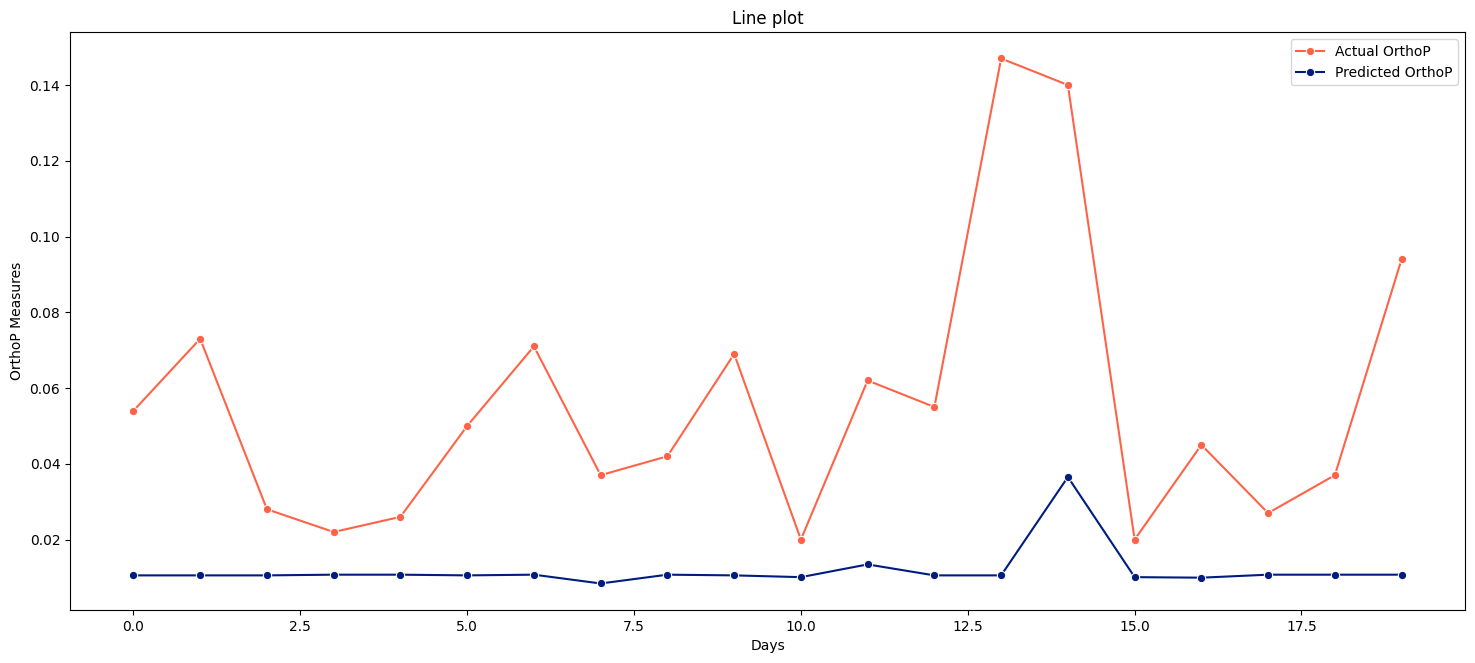

In [92]:
print(lightGBM_dfFinal['OrthoP'].min(), lightGBM_dfFinal['OrthoP'].max())
print(lightGBM_dfFinal['Predicted_OrthoP'].min(), lightGBM_dfFinal['Predicted_OrthoP'].max(), lightGBM_dfFinal['OrthoP'].mean(), lightGBM_dfFinal['Predicted_OrthoP'].mean())

if (len(lightGBM_dfFinal) > 500):
    #lightGBM_df_reSample = lightGBM_dfFinal.sample(frac=0.6,random_state=1).reset_index(drop=False)
    lightGBM_df_reSample = lightGBM_dfFinal.head(500)
else:
    lightGBM_df_reSample = lightGBM_dfFinal

#custom_palette = sns.color_palette(["#FF6347", "#4682B4", "#32CD32"])
custom_palette = sns.color_palette(["#FF6347", "#4682B4"])

plt.figure(figsize=(18,7.5))

sns.lineplot({"Date": lightGBM_df_reSample['sampleDateOnly'], "Actual OrthoP" : lightGBM_df_reSample['OrthoP']}, markers=True, 
             palette=custom_palette)
ap = sns.lineplot({"Date": lightGBM_df_reSample['sampleDateOnly'], "Predicted OrthoP" : lightGBM_df_reSample['Predicted_OrthoP']}, markers=True,palette='dark')

# Set label for x-axis y-axis
ap.set(xlabel ="Days", ylabel = "OrthoP Measures", title ='Line plot')

plt.show()

In [93]:
#lightGBM_df_reSample.head(2) 

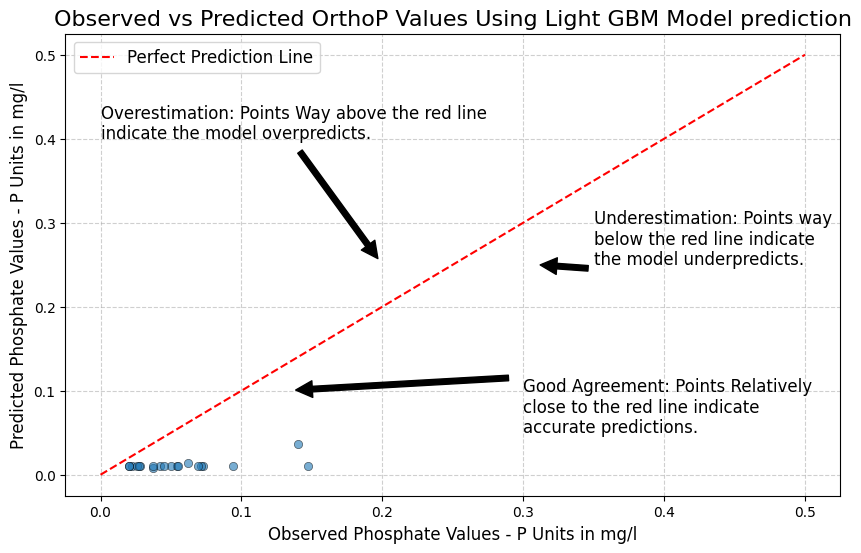

In [94]:
#*********************************************************************
# Create a scatter plot for Ground Truth Validation data *************
#*********************************************************************

plt.figure(figsize=(10, 6))
#sns.scatterplot(x=y_valid, y=y_predict, alpha=0.6, edgecolor='k') #Commented on 10 Aug 2025
sns.scatterplot(x=lightGBM_df_reSample['OrthoP'].head(2500), y=lightGBM_df_reSample['Predicted_OrthoP'].head(2500), alpha=0.6, edgecolor='k') #Added on 10 Aug 2025

# Add a 45-degree line to represent perfect predictions
#plt.plot([0, 10], [0, 10], 'r--', label='Perfect Prediction Line')
#plt.plot([0, 3], [0, 3], 'r--', label='Perfect Prediction Line')
plt.plot([0, 0.5], [0, 0.5], 'r--', label='Perfect Prediction Line')

# Add labels and title
plt.title('Observed vs Predicted OrthoP Values Using Light GBM Model prediction', fontsize=16)
plt.xlabel('Observed Phosphate Values - P Units in mg/l', fontsize=12)
plt.ylabel('Predicted Phosphate Values - P Units in mg/l', fontsize=12)

# Add annotations for key inferences
plt.annotate('Good Agreement: Points Relatively \nclose to the red line indicate \naccurate predictions.',
             #xy=(2, 2.5), xytext=(3, 1), fontsize=12,
             #xy=(0.6, 0.8), xytext=(0.9, 0.3), fontsize=12,
             xy=(0.13, 0.1), xytext=(0.3, 0.05), fontsize=12,
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.annotate('Overestimation: Points Way above the red line\nindicate the model overpredicts.',
             #xy=(2.1, 2.7), xytext=(1.5, 2.4), fontsize=12,
             xy=(0.2, 0.25), xytext=(0.0, 0.4), fontsize=12,
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.annotate('Underestimation: Points way \nbelow the red line indicate \nthe model underpredicts.',
             #xy=(2.7, 2.1), xytext=(2.1, 1.5), fontsize=12,
             xy=(0.31, 0.25), xytext=(0.35, 0.25), fontsize=12,
             arrowprops=dict(facecolor='black', shrink=0.05))

# Add a legend
plt.legend(loc='upper left', fontsize=12)

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()


In [95]:
#exit() This statement shall restart the kernel hence commenting
if (len(lightGBM_df_reSample) <= 2):
    raise SystemExit("Less than 2 predictions hence can't apply comparable SHAP metrics")
else:
    read_file_name

# Responsible AI Metrics - Explainability metrics using SHAP

In [96]:
#Responsible AI - Begin

# One-time installation of SHAP library

In [97]:
#Responsible AI
# Step 0: Install & Import required libraries for Shape testing
#pip install sklearn --user
#!pip install numpy | grep -v 'already'
!pip install shap | grep -v 'already' # Install SHAP if not already done
#!pip install --force-reinstall shap==0.44.0 lightgbm==4.1.0
#!conda install -c conda-forge shap -y


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


# Import required libraries

In [98]:
### **Fixed Code (Tested on Multiple SHAP Versions):**
import pickle
import shap
#import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt
from lightgbm import LGBMRegressor
import lightgbm as lgb

print("Step 1: Load pre-trained LightGBM model")

model_pkl_file = "pkls/LGBM_WithRMon_R1.pkl"
with open(model_pkl_file, 'rb') as file:  
    lightGBM_sklearn = pickle.load(file)

print("Step 2: Extract the native LightGBM booster")
#model = lightGBM_sklearn.booster_
#lightGBM_sklearn.booster_.save_model('../NW_CodePP/model.txt')
#lightGBM_sklearn.booster_.save_model('../RDMAI_1C_OrthoP_R1/06_Saved_Model.txt')
lightGBM_sklearn.booster_.save_model('pkls/LGBM_WithRMon_R1.txt')

#import lightgbm as lgbshpvalid
#model = lgb.Booster(model_file='../NW_CodePP/model.txt')
model = lgb.Booster(model_file='pkls/LGBM_WithRMon_R1.txt')

print("Step 3: Load dataset (for background data)")
#data = pd.read_csv('water_catchment_data.csv')
print("Training Dataset (Used for Background Context) - When to Use")
print(" Global Explanations (how the model behaves overall) | Baseline Calculation (`explainer.expected_value`) | Feature Importance")
#Xsample = X_train.sample(frac=0.00009, random_state=42)
#Xsample = X_train.sample(frac=0.4, random_state=42)
#ysample = y_train[y_train.index.isin(Xsample.index)]

print("Test/Prediction/Validation/New Dataset (Used for Background Context) - When to Use")
print("Local Explanations (individual predictions) | Model Debugging (why specific predictions are wrong) | Domain Validation (do explanations align with expert knowledge?)")
Xvalid = X_valid #X_test
yvalid = y_valid #y_test


#print(len(Xsample), len(Xvalid), len(yvalid))
#Since we have loaded X and y already this step is commented


Step 1: Load pre-trained LightGBM model
Step 2: Extract the native LightGBM booster
Step 3: Load dataset (for background data)
Training Dataset (Used for Background Context) - When to Use
 Global Explanations (how the model behaves overall) | Baseline Calculation (`explainer.expected_value`) | Feature Importance
Test/Prediction/Validation/New Dataset (Used for Background Context) - When to Use
Local Explanations (individual predictions) | Model Debugging (why specific predictions are wrong) | Domain Validation (do explanations align with expert knowledge?)


1. Load model
2. Create prediction wrapper
3. Initialize KernelExplainer with version-safe parameters
4. Get SHAP values : Highest variance


  0%|          | 0/1 [00:00<?, ?it/s]

5. Plot explanation for Visuals depicting the Influence of the Determinands in Model Training for OrthoP - Responsible AI


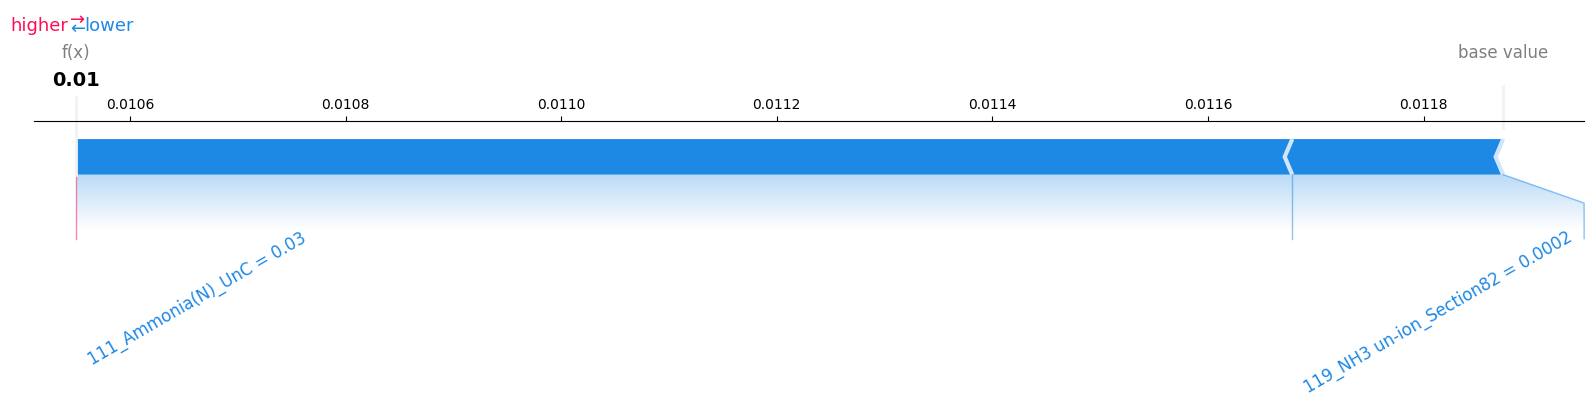

4. Get SHAP values : Lowest variance


  0%|          | 0/1 [00:00<?, ?it/s]

5. Plot explanation for Visuals depicting the Influence of the Determinands in Model Training for OrthoP - Responsible AI


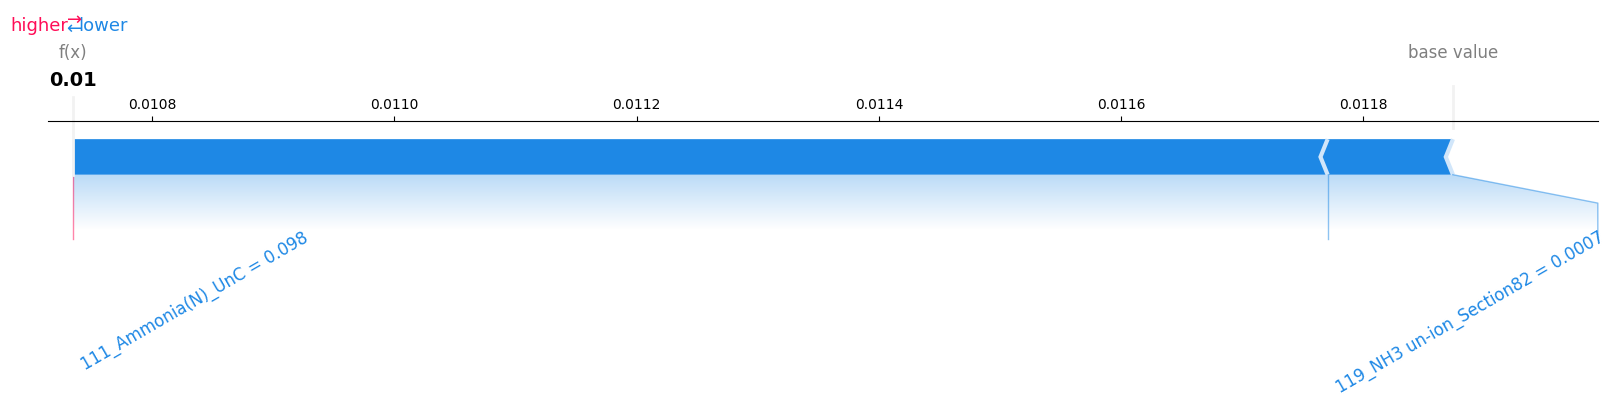

In [99]:
#*****************************************************************************
# ********* RESPONSIBLE AI - VALIDATION | PREDICTION EXPLAINATION. ***********
#*****************************************************************************

#import shap
#import lightgbm as lgb
#import pandas as pd

print("1. Load model")
#model_V = lgb.Booster(model_file='model.txt')
model_V = lgb.Booster(model_file='pkls/LGBM_WithRMon_R1.txt')

print("2. Create prediction wrapper")
def lgb_predict_V(data):
    return model_V.predict(data.values if isinstance(data, pd.DataFrame) else data)

print("3. Initialize KernelExplainer with version-safe parameters")
try:
    # For SHAP >=0.41.0
    explainer = shap.KernelExplainer(
        model=lgb_predict_V, 
        data=Xvalid,    # Backgroud data (Supply Training or Validation data)
        link="identity"  # Use string instead of shap.links.identity
    )
except TypeError:
    # Fallback for older SHAP versions
    explainer = shap.KernelExplainer(
        model=lgb_predict_V, 
        data=Xvalid     # Backgroud data (Supply Training or Validation data)
    )

print("4. Get SHAP values : Highest variance")
shap_values_V = explainer.shap_values(Xvalid.iloc[[5]])
print("5. Plot explanation for Visuals depicting the Influence of the Determinands in Model Training for OrthoP - Responsible AI")
shap.force_plot(
    explainer.expected_value,
    shap_values_V,
    Xvalid.iloc[5], 
    feature_names=Xvalid.columns,
    matplotlib=True,
    text_rotation=30
)

print("4. Get SHAP values : Lowest variance")
shap_values_V_Low = explainer.shap_values(Xvalid.iloc[[6]])
print("5. Plot explanation for Visuals depicting the Influence of the Determinands in Model Training for OrthoP - Responsible AI")
shap.force_plot(
    explainer.expected_value,
    shap_values_V_Low,
    Xvalid.iloc[6], 
    feature_names=Xvalid.columns,
    matplotlib=True,
    text_rotation=30
)


#print("Step 6. Explain TEST predictions (predicted data)")
#shap_values_valid = explainer.shap_values(Xvalid)
#shap.decision_plot(explainer.expected_value, shap_values_valid, Xvalid)

#plt.gcf().set_size_inches(12,4) #Adjust the plot size
#plt.tight_layout()
#plt.show()

In [100]:
#Critical step to calculate shap value for overall prediction
shap_values_V_Full = explainer.shap_values(Xvalid)
#print(shap_values_valid)

  0%|          | 0/20 [00:00<?, ?it/s]

Explainer expected value: [0.01570675]
SHAP Decision PLOT using entire Validation dataset


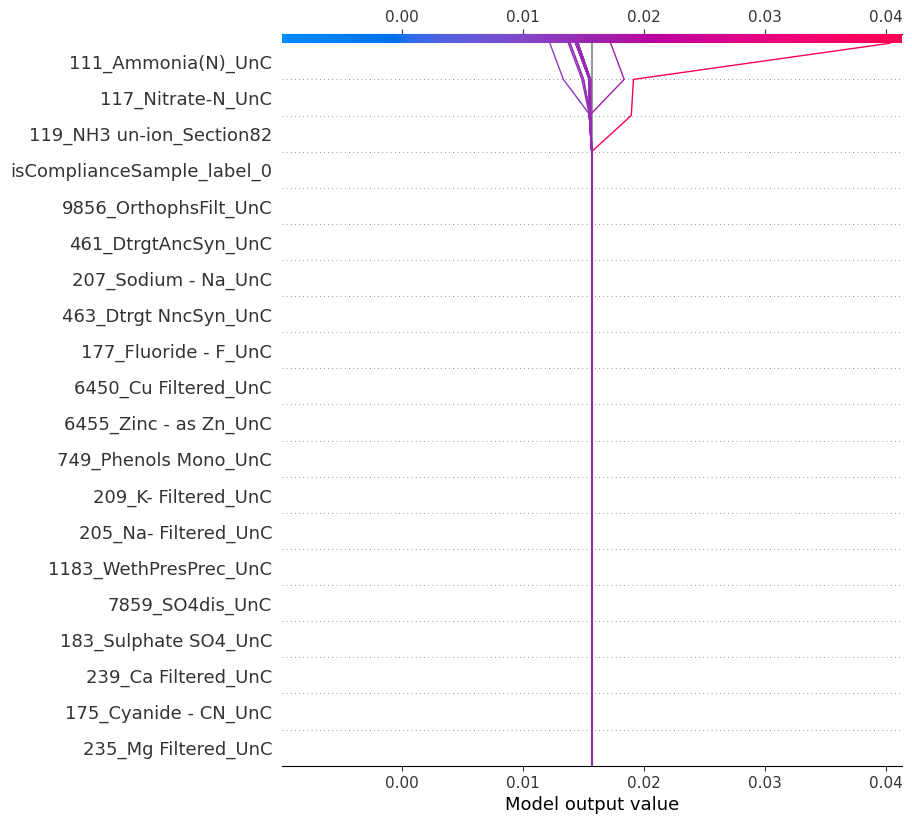

In [101]:
#Various decision plots
#https://shap.readthedocs.io/en/latest/example_notebooks/api_examples/plots/decision_plot.html
#Sample 1

import warnings
warnings.filterwarnings('ignore')

explainer = shap.TreeExplainer(model)
expected_value = explainer.expected_value
if isinstance(expected_value, list):
    expected_value = expected_value[1]
print(f"Explainer expected value: {expected_value}")

select = range(len(Xvalid)) # 197 observations
features = Xvalid.iloc[select]
features_display = Xvalid.loc[features.index]

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    shap_values = explainer.shap_values(features)[1]
    shap_interaction_values = explainer.shap_interaction_values(features)
if isinstance(shap_interaction_values, list):
    shap_interaction_values = shap_interaction_values[1]

print("SHAP Decision PLOT using entire Validation dataset")
shap.decision_plot(explainer.expected_value, shap_values_V_Full, Xvalid)

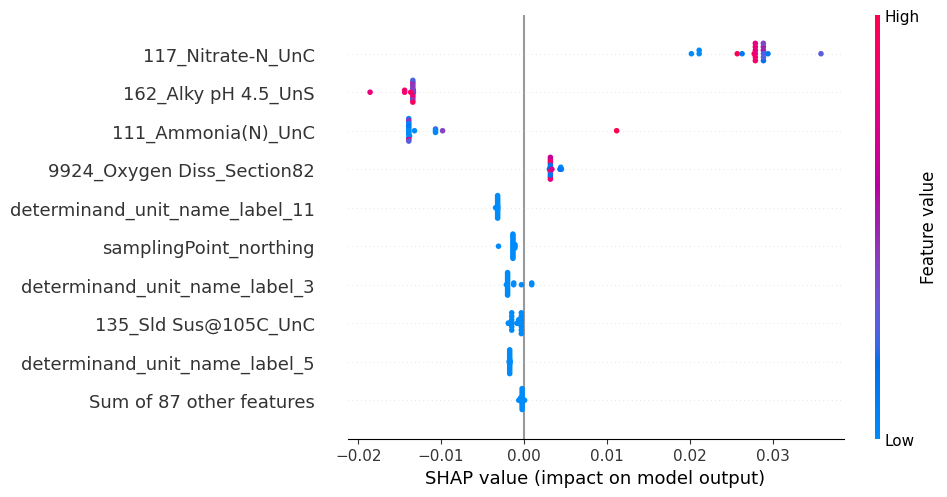

In [102]:
#as requested by WRC, beeswarm plot is generated

# compute SHAP values
explainer_bee2 = shap.Explainer(model)
shap_values_bee2 = explainer(X_valid)
#shap.plots.beeswarm(shap_values_bee2, max_display=100)
shap.plots.beeswarm(shap_values_bee2, order=shap_values_bee2.abs.max(0))


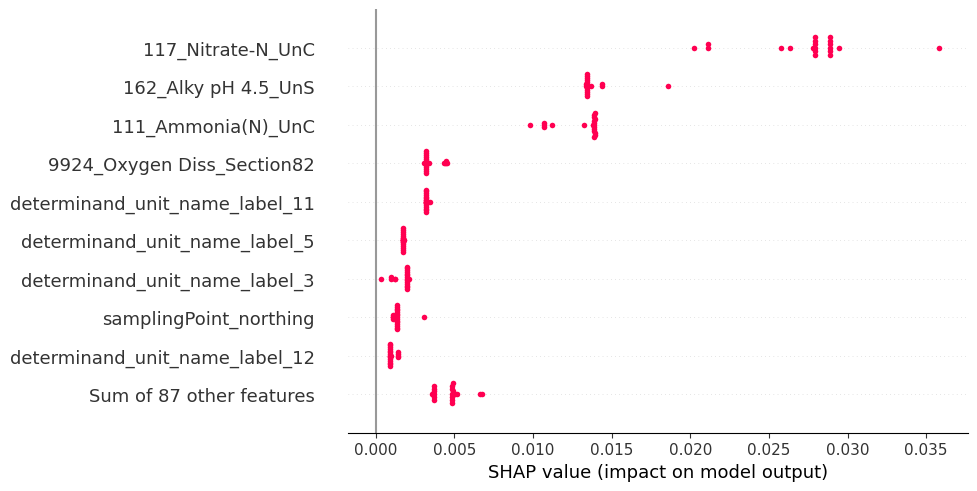

In [103]:
#continuity to the above code cell 
shap.plots.beeswarm(shap_values_bee2.abs, color="shap_red")


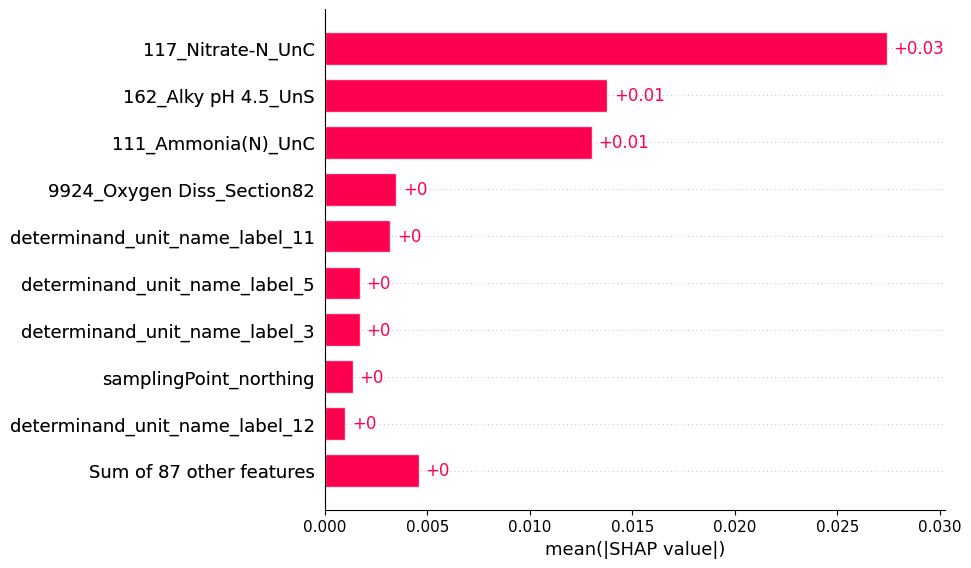

In [104]:
#continuity to the above code cell 
shap.plots.bar(shap_values_bee2.abs.mean(0))


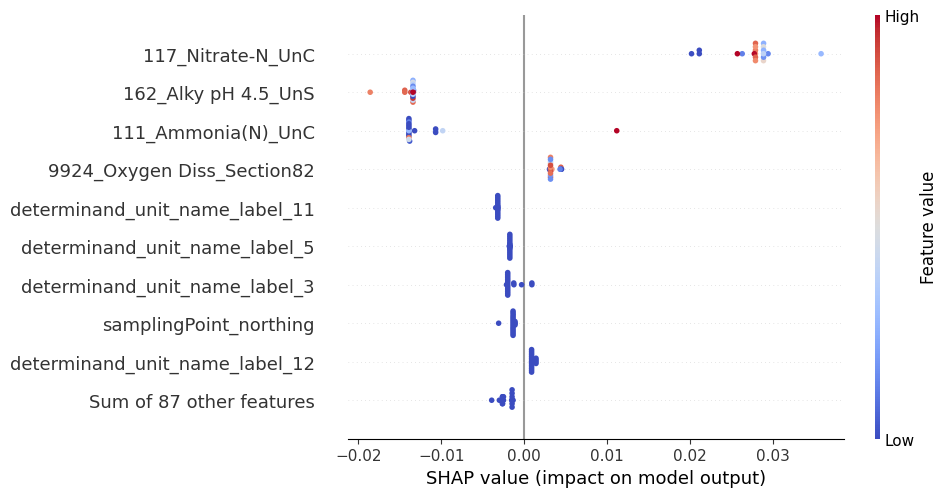

In [105]:
#continuity to the above code cell 
shap.plots.beeswarm(shap_values_bee2, color=plt.get_cmap("coolwarm"))


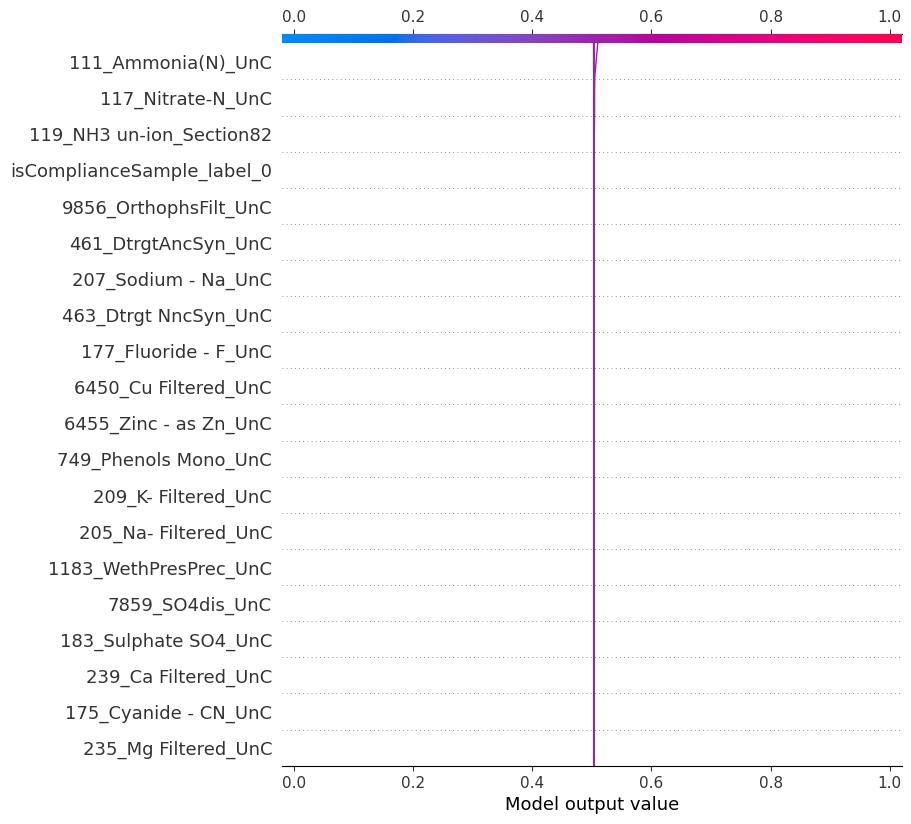

In [106]:
#Various decision plots
#https://shap.readthedocs.io/en/latest/example_notebooks/api_examples/plots/decision_plot.html
#Sample 2

shap.decision_plot(expected_value, shap_values_V_Full, features_display, link="logit")


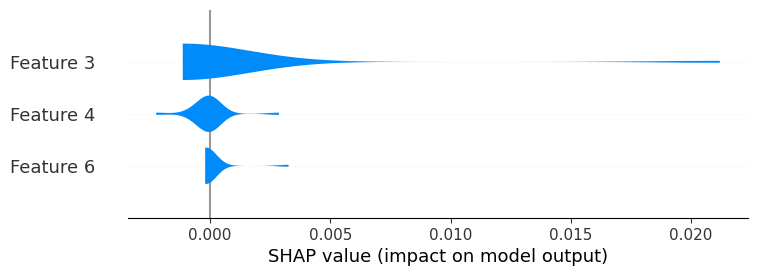

In [107]:
#Violin plots Feature Importance
#https://shap.readthedocs.io/en/latest/example_notebooks/api_examples/plots/violin.html
#Sample 3

feat_names = list(Xvalid.columns)
#ZeroDivisionError: division by zero:- Please note change the max_display to a number that does not give the error. Here 11 works 
#good as there are 11 influential features 
#shap.plots.violin(shap_values_V_Full, features=Xvalid, max_display=11, feature_names=feat_names, plot_type="layered_violin")

#shap.plots.violin(shap_values_V_Full, features=Xvalid, max_display=7, feature_names=feat_names, plot_type="layered_violin")

#shap.plots.violin(shap_values_V_Full, feature_names=feat_names)
shap.plots.violin(shap_values_V_Full, max_display=3)
#shap.plots.violin(shap_values_V_Full)


In [108]:
#Final Checks
#Data Validation
print("Missing values: ", Xvalid.isnull().sum().sum())    #must be zero
#print("Infinite values: ", np.isinf(Xp.values).sum()) #must be zero

#Version verification
print ("SHAP version: ", shap.__version__)   #should be >- 0.41.0
print("LightGBM version: ", lgb.__version__) #should be >= 4.0.0

#Model Sanity Check
print(model.predict(Xvalid.iloc[[0]])) #Should return valid predictions

#Missing values:  0
#SHAP version:  0.47.2
#LightGBM version:  4.5.0
#[0.05070975]

Missing values:  0
SHAP version:  0.47.2
LightGBM version:  4.5.0
[0.01055017]


In [109]:
#Responsible AI - End

In [110]:
showtime()

18 September 2025 15:52:42


()

# End CARD

In [111]:
#exit() Uncomment if you need to release the compute resources used in the above executions